<a href="https://colab.research.google.com/github/evillag/opn/blob/main/tp3/OPN_TP3_ACFUEV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quiet optuna
!pip install --quiet plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 4.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import optuna
import pandas as pd
import torch
import random

from mpl_toolkits.mplot3d import Axes3D

optuna.logging.set_verbosity(optuna.logging.WARNING)

# Trabajo práctico 3: Optimización
**Profesor Ph. D. Saúl Calderón Ramírez**

**Instituto Tecnológico de Costa Rica**

**Escuela de Computación, programa en Ciencias de Datos**

**Curso: Optimización y Programación Numérica**

---

**Fecha de entrega:** 1 de Junio de 2025.

**Entrega**: digital, por medio de la plataforma TEC-digital.

**Modo de trabajo**: Grupos de 3 personas.

*Para la documentación externa de este proyecto, incluya la explicación de cada método, y al menos 2 pruebas unitarias debidamente documentadas por cada uno. Para la documentación interna utilice un estándar de Doxygen https://tinyurl.com/55hxcd7r. La documentación externa debe realizarse en un documento pdf generado por latex, y la implementación debe entregarse en un notebook de jupyter. *


---
**Elaborado por**:

*   Andres Chavarria Sibaja
*   Fernando Ugalde Green
*   Esteban Villalobos Gomez
---

# Optimización de funciones

Para las siguientes funciones:

$$
f_{0}\left(x,y\right)=x^{2}+y^{2}
$$



$$
f_{1}\left(x,y\right)=-20e^\left[-0.2\sqrt{0.5\left(x^{2}+y^{2}\right)}\right]-e^\left[0.5\left(\cos2\pi x+\cos2\pi y\right)\right]+e+20
$$



$$
f_{2}\left(x,y\right)=(x^{2}+y-11)^{2}+(x+y^{2}-7)^{2}
$$

Con $x_{1},x_{2}\in\left[-10,10\right]$.


---


Para todos los algoritmos, ejecútelos por $P=25$ iteraciones e inicialice
las soluciones en el rango $x_{1},x_{2}\in\left[-10,10\right]$.

##  * 1.**(20 puntos)** Según tales gráficas, grafique las funciones usando la función *meshgrid* y *contour*, y distinga si las funciones son convexas o no, y los puntos mínimos y regiones o puntos silla.

In [3]:
# Versión numpy de las funciones e implementacion de graficas

def f0(x, y):
  """! @brief Función esfera.

  La función está definida como $f_0(x,y) = x^2 + y^2$.

  @param x La coordenada x (escalar o array de numpy).
  @param y La coordenada y (escalar o array de numpy).

  @return El valor de la función $f_0(x,y)$.
  """

  return x**2 + y**2

def f1(x, y):
  """! @brief Calcula la función de Ackley.
  La función está definida como $f_1(x,y) = -20e^{-0.2\sqrt{0.5(x^2+y^2)}} - e^{0.5(\cos2\pi x + \cos2\pi y)} + e + 20$.

  @param x La coordenada x (escalar o array de numpy).
  @param y La coordenada y (escalar o array de numpy).

  @return El valor de la función $f_1(x,y)$.
  """
  return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

def f2(x, y):
  """! @brief Calcula la función de Himmelblau.
  La función está definida como $f_2(x,y) = (x^2+y-11)^2 + (x+y^2-7)^2$.

  @param x La coordenada x (escalar o array de numpy).
  @param y La coordenada y (escalar o array de numpy).

  @return El valor de la función $f_2(x,y)$.
  """
  return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

funcs_labels = [
  (f0, "$f_0(x,y) = x^2 + y^2$"),
  (f1, "$f_1(x,y) = -20e^{-0.2\sqrt{0.5(x^2+y^2)}} - e^{0.5(\cos2\pi x + \cos2\pi y)} + e + 20$"),
  (f2, "$f_2(x,y) = (x^2+y-11)^2 + (x+y^2-7)^2$")
]

def plot_function(func, label, range_x= np.linspace(-10, 10, 100), range_y=np.linspace(-10, 10, 100),
                  mark_points=None, points_label="Mínimo"):
  """! @brief Genera y muestra un gráfico de superficie 3D (meshgrid) y un gráfico de contorno 2D para una función dada.

  Esta función toma una función matemática, su etiqueta LaTeX, rangos para x e y, y opcionalmente
  una lista de puntos para marcar en los gráficos.

  @param func La función a graficar. Debe ser un callable que acepte dos argumentos (x, y) y devuelva un valor.
  @param label Una cadena de texto (preferiblemente en formato LaTeX) que describe la función, usada en los títulos.
  @param range_x Un array de numpy que define los valores para el eje x. Por defecto, `np.linspace(-10, 10, 100)`.
  @param range_y Un array de numpy que define los valores para el eje y. Por defecto, `np.linspace(-10, 10, 100)`.
  @param mark_points Una lista opcional de tuplas `(x,y)` que representan puntos a destacar en los gráficos (e.g., mínimos, máximos, puntos silla). Por defecto, `None`.
  @param points_label Una cadena de texto para la leyenda de los puntos marcados. Por defecto, "Mínimo".

  @return None. La función muestra los gráficos directamente usando `plt.show()`.
  """
  X, Y = np.meshgrid(range_x, range_y)
  Z = func(X, Y)
  px = []
  py = []
  pz = []

  if mark_points: # Solo si hay puntos definidos para esta función
    px = np.array([p[0] for p in mark_points])
    py = np.array([p[1] for p in mark_points])
    pz = func(px, py)

  # Meshgrid
  fig = plt.figure(figsize=(14, 6))

  ax1 = fig.add_subplot(121, projection='3d')
  surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
  ax1.set_xlabel('x')
  ax1.set_ylabel('y')
  ax1.set_zlabel('$f(x,y)$')
  ax1.set_title(f'Meshgrid\n{label}')
  fig.colorbar(surf, shrink=0.5, aspect=5, ax=ax1, label='f(x,y)')

  # Agregar puntos
  if mark_points:
      ax1.scatter(px, py, pz, color='red', marker='x', s=25, depthshade=True, label=points_label) # s es el tamaño del marcador
      # Etiqueta para cada punto
      for j in range(len(px)):
          ax1.text(px[j], py[j], pz[j] + 0.1 * np.max(Z - np.min(Z)), f'({px[j]:.1f},{py[j]:.1f})', color='red', fontsize=8)

  # Countour
  ax2 = fig.add_subplot(122)
  contour = ax2.contourf(X, Y, Z, 20, cmap='viridis') # Relleno entre contornos
  contour_lines = ax2.contour(X, Y, Z, 20, colors='black', linewidths=0.5) # Líneas de contorno
  ax2.clabel(contour_lines, inline=True, fontsize=8)
  ax2.set_xlabel('x')
  ax2.set_ylabel('y')
  ax2.set_title(f'Contour\n{label}')
  fig.colorbar(contour, ax=ax2, label='$f(x,y)$')
  # Agregar los puntos a la gráfica de contorno
  if mark_points:
    ax2.scatter(px, py, color='red', marker='x', s=25, label=points_label) # Usar scatter para consistencia
    # Añadir etiquetas a los puntos en el gráfico de contorno
    for j in range(len(px)):
        ax2.text(px[j] + 0.1, py[j] + 0.1, f'({px[j]:.1f},{py[j]:.1f})', color='red', fontsize=8)


  # Agregar leyenda si se marcaron puntos
  if mark_points:
      handles, labels = [], []
      # Obtener handles y labels de ax1 y ax2, asegurando no duplicar "Puntos Marcados"
      h1, l1 = ax1.get_legend_handles_labels()
      h2, l2 = ax2.get_legend_handles_labels()

      if h1: # Si hay leyenda en el 3D (debería haber si hay puntos)
        handles.append(h1[0]) # Asumimos que el scatter es el primer elemento con leyenda
        labels.append(l1[0])

      # Podríamos querer una sola leyenda para toda la figura
      # fig.legend(handles, labels, loc='upper center', ncol=len(labels))
      # O leyendas individuales
      ax1.legend(loc='upper right')
      ax2.legend(loc='upper right')
  plt.tight_layout()
  plt.show()

---

$f_{0}\left(x,y\right)=x^{2}+y^{2}$, con $x_{1},x_{2}\in\left[-10,10\right]$.



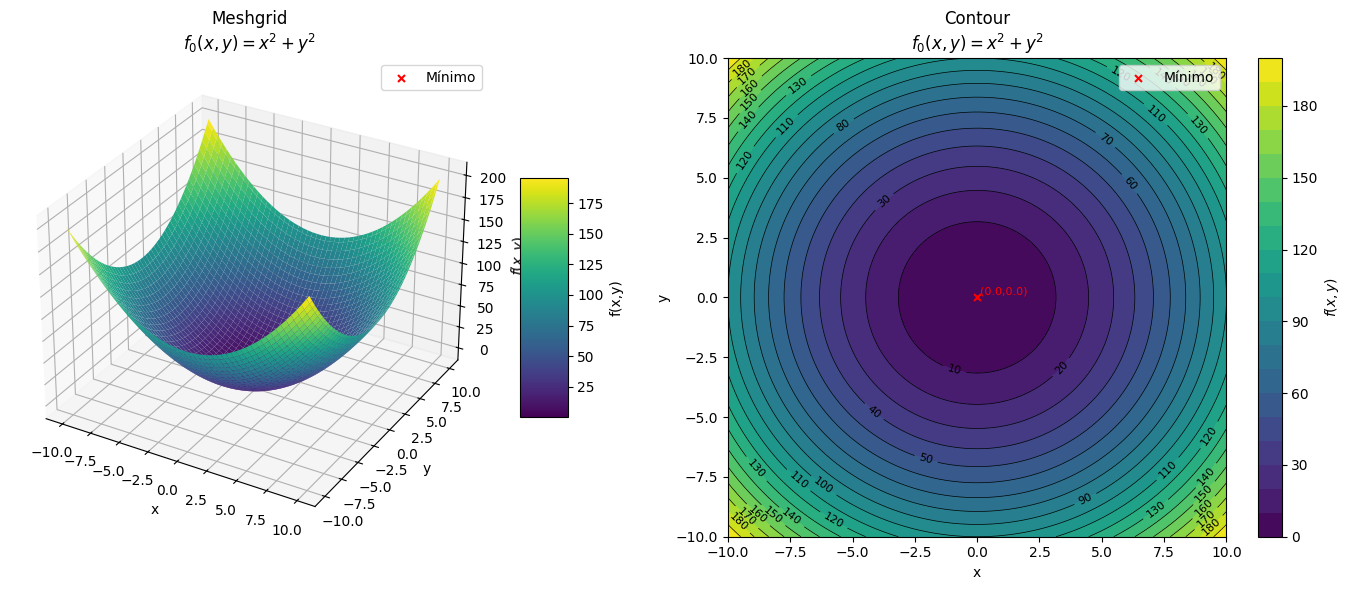

Valor en el minimo: 0


In [190]:
_f, _label = funcs_labels[0]
plot_function(_f, _label, mark_points=[(0,0)])

print("Valor en el minimo:", _f(0,0))



---


$$f_{1}\left(x,y\right)=-20e^\left[-0.2\sqrt{0.5\left(x^{2}+y^{2}\right)}\right]-e^\left[0.5\left(\cos2\pi x+\cos2\pi y\right)\right]+e+20$$

Con $x_{1},x_{2}\in\left[-10,10\right]$.

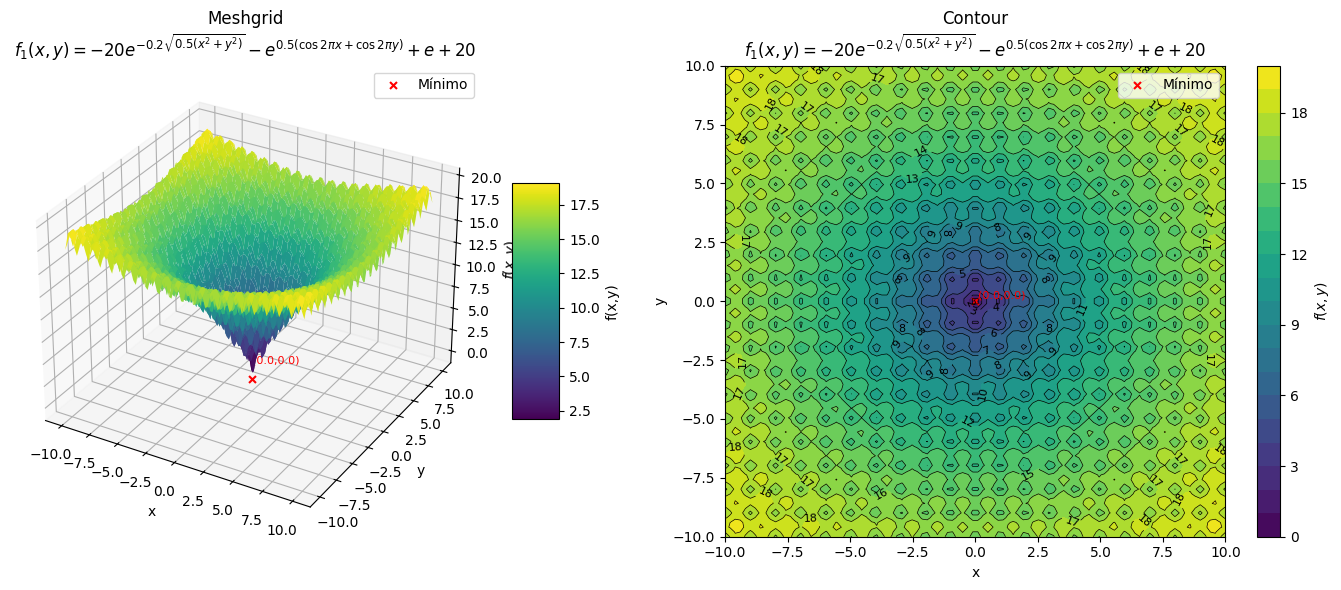

Valor en el minimo: 0.0


In [191]:
_f, _label = funcs_labels[1]
plot_function(_f, _label, mark_points=[(0,0)])

print("Valor en el minimo:", _f(0,0))

$$f_{1}\left(x,y\right)=-20e^\left[-0.2\sqrt{0.5\left(x^{2}+y^{2}\right)}\right]-e^\left[0.5\left(\cos2\pi x+\cos2\pi y\right)\right]+e+20$$

Con $x_{1},x_{2}\in\left[-5,5\right]$, haciendo un *zoom*.

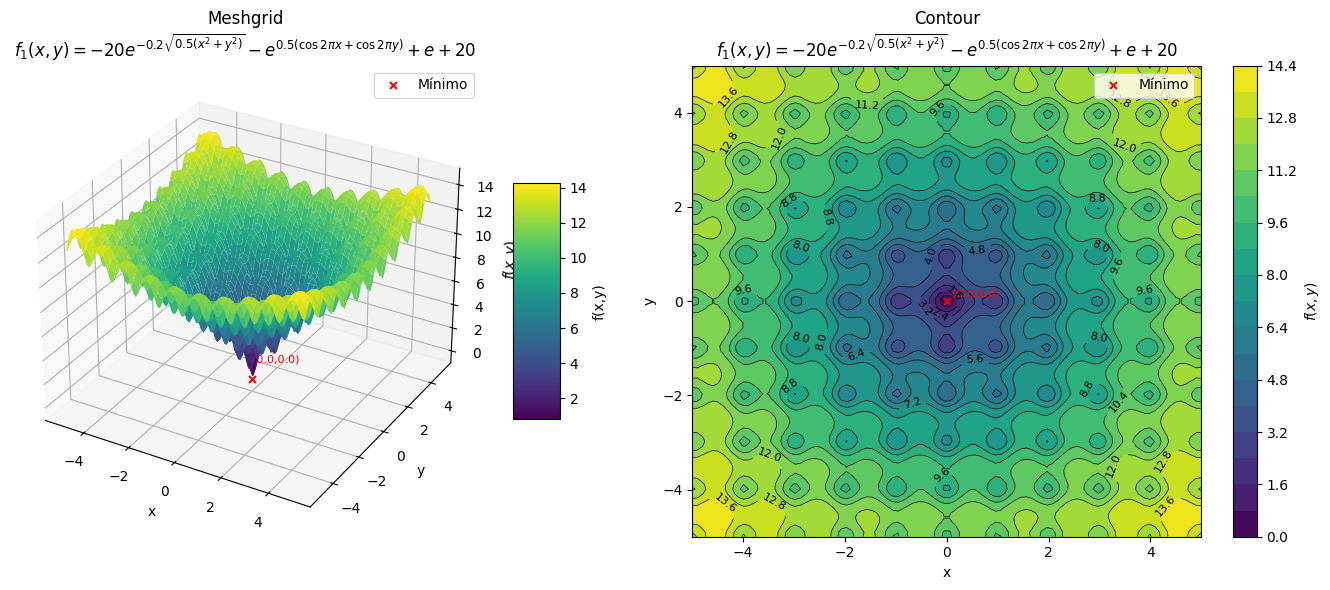

In [6]:
_f, _label = funcs_labels[1]
plot_function(_f, _label, np.linspace(-5, 5, 100), np.linspace(-5, 5, 100), mark_points=[(0,0)])



---

$$
f_{2}\left(x,y\right)=(x^{2}+y-11)^{2}+(x+y^{2}-7)^{2}
$$

Con $x_{1},x_{2}\in\left[-10,10\right]$.




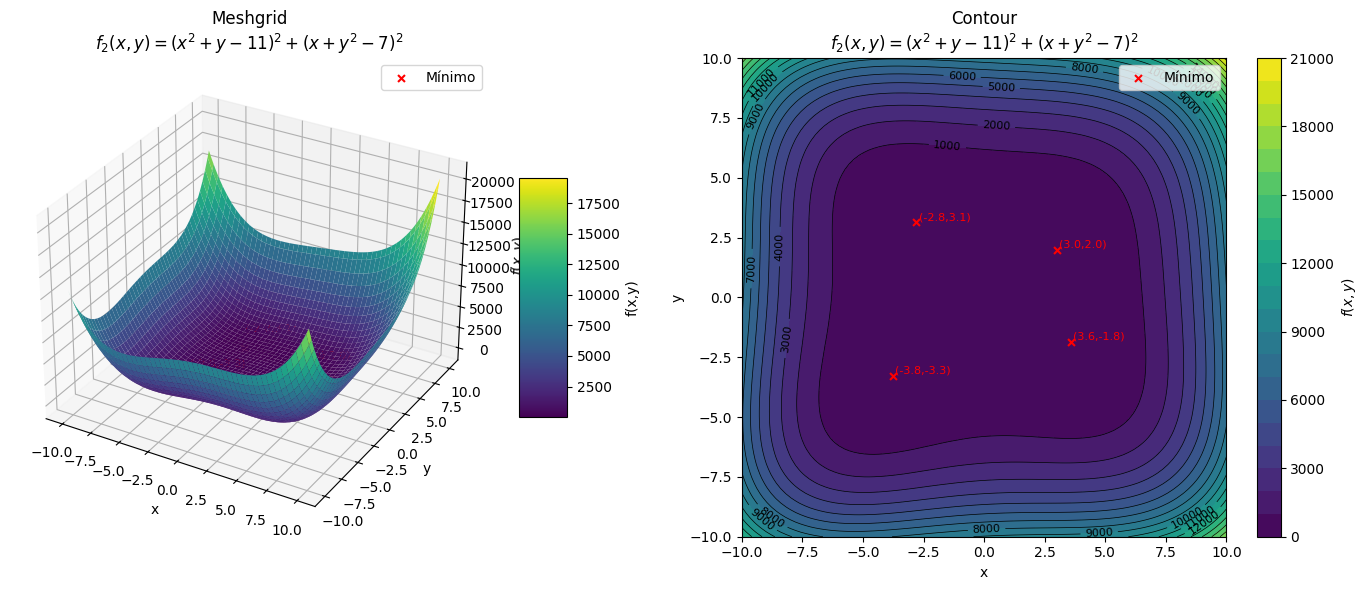

Valor en el minimo: (3,2) -> 0
Valor en el minimo: (-2.805118,3.131312) -> 1.0989296656869089e-11
Valor en el minimo: (-3.77931,-3.283186) -> 3.797861082863832e-12
Valor en el minimo: (3.584428,-1.848126) -> 8.894376497582423e-12


In [194]:
f2_minimos = [(3,2), (-2.805118, 3.131312), (-3.779310, -3.283186), (3.584428, -1.848126),]
_f, _label = funcs_labels[2]
plot_function(_f, _label, mark_points=f2_minimos)

for _x, _y in f2_minimos:
  print(f"Valor en el minimo: ({_x},{_y}) ->", _f(_x, _y))


$$
f_{2}\left(x,y\right)=(x^{2}+y-11)^{2}+(x+y^{2}-7)^{2}
$$

Con $x_{1},x_{2}\in\left[-5,5\right]$, como haciendo *zoom*.




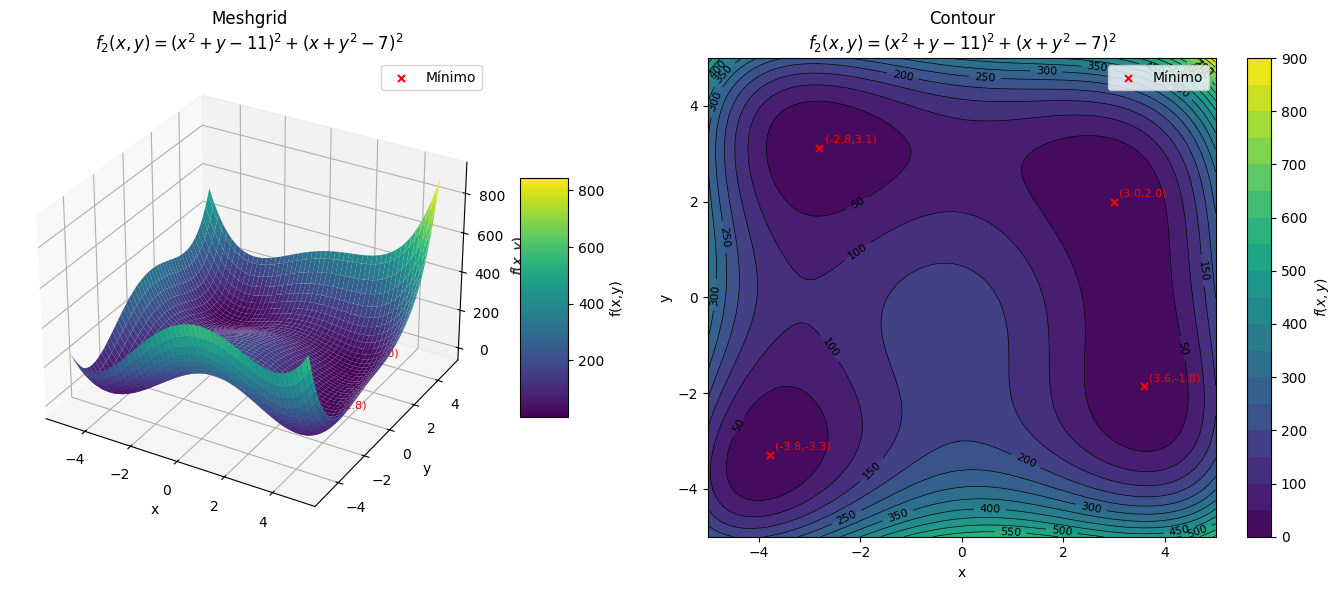

In [8]:
_f, _label = funcs_labels[2]
plot_function(_f, _label, np.linspace(-5, 5, 100), np.linspace(-5, 5, 100), mark_points=f2_minimos)



---

### Análisis de las funciones

La función $f_{0}\left(x,y\right)=x^{2}+y^{2}$, es una función **convexa**, con un único mínimo global en el punto $(0,0)$, no presenta puntos sillas



1.   La función $f_{0}\left(x,y\right)=x^{2}+y^{2}$, es una función **convexa**, con un único mínimo global en el punto $(0,0)$, no presenta ni regiones ni puntos silla.
2.   La función $f_{1}\left(x,y\right)=-20e^\left[-0.2\sqrt{0.5\left(x^{2}+y^{2}\right)}\right]-e^\left[0.5\left(\cos2\pi x+\cos2\pi y\right)\right]+e+20$, es conocida como la función de Ackley$^1$, tiene un único mínimo global en el punto $(0,0)$, pero hipotetizamos que tiene infinito número de mínimos locales, es una función **No Convexa**, y presenta múltiples puntos silla en las regiones entre mínimos locales y el mínimo global, donde la gradiente es $0$ sin estar en un mínimo.
3.   La función $f_{2}\left(x,y\right)=(x^{2}+y-11)^{2}+(x+y^{2}-7)^{2}$ es conocida como la función de Himmelblau$^2$, presenta $4$ mínimos idénticos, los cuales son los mínimos globales en $(3,2), (-2.805, 3.131), (-3.779, -3.283)$ y $(3.584, -1.848)$, es una función **No Convexa**, presenta $4$ mínimos locales que a su vez son los globales. Existe una región donde se puede considerar existen varios puntos silla, es **alrededor** de $(0,-1)$ donde la gradiente parece ser $0$ y no es un punto mínimo:

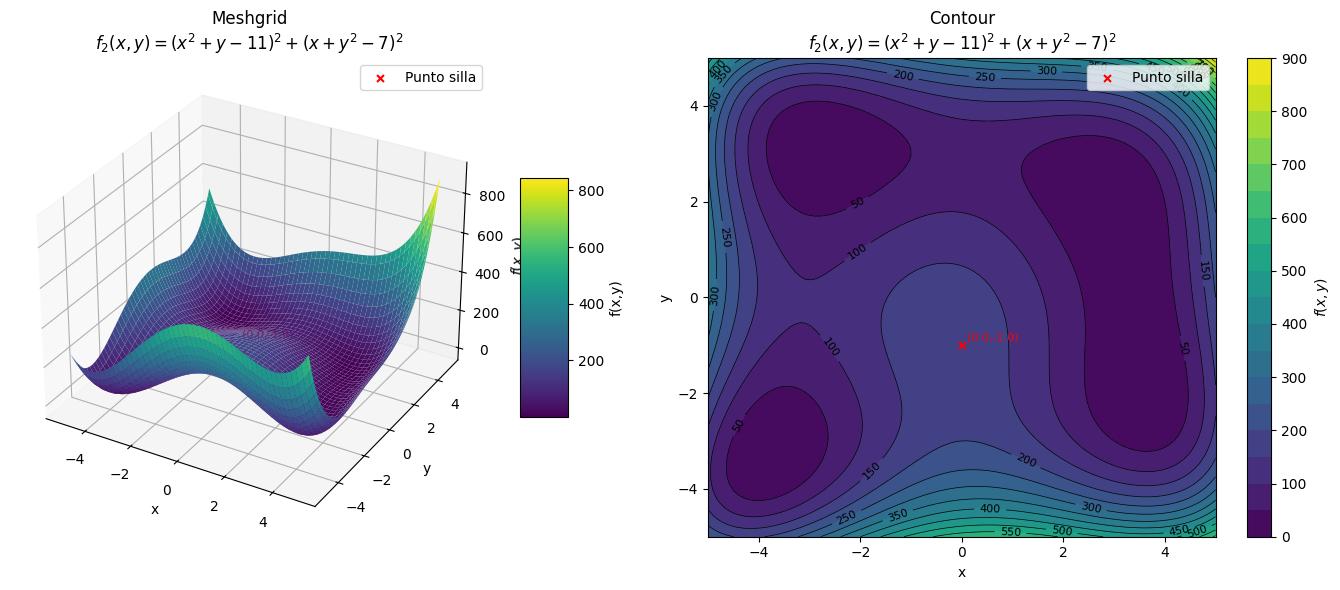

In [9]:
_f, _label = funcs_labels[2]
plot_function(_f, _label, np.linspace(-5, 5, 100), np.linspace(-5, 5, 100), mark_points=[(0,-1)], points_label="Punto silla")

Notas:


*   $^1$ Ackley, D. H. (1987). The model. In A Connectionist Machine for Genetic Hillclimbing (pp. 29-70). Boston, MA: Springer US.
*   $^2$ Himmelblau, D. M. (2018). Applied nonlinear programming. McGraw-Hill.

---



## * 2.(40 puntos) Implemente el algoritmo del **RMS prop**. para encontrar el punto mínimo en pytorch, de la forma mas vectorial posible. Implemente las siguientes pruebas.

*   a) Para cada función, calibre los hiper-parámetros del algoritmo, mostrando el proceso de calibrado usando las gráficas de aprendizaje, y reporte los mejores valores encontrados.
      *    1) Realice el proceso de calibración usando un framework como optuna https://optuna.org/ o weights and biases https://wandb.ai/site. Reporte los mejores valores encontrados.

*    b) Realice lo anterior para el algoritmo del descenso del gradiente.
*    c) ¿Porqué el algoritmo RMS prop es más efectivo en evitar atascarse en puntos silla que el algoritmo del descenso del gradiente?
*    d) Para los mejores valores encontrados, en cada funcion, por un máximo de 50 iteraciones (para el algoritmo del descenso del gradiente, y RMS prop):
      *    1) Ejecute el algoritmo 10 corridas diferentes, y documente en una tabla la cantidad de iteraciones para converger a el o los puntos minimos (indique si convergió).
      *    2) Muestre el valor promedio de la función minimizada para las 10 corridas, y la cantidad de iteraciones promedio en converger.
*    e) Muestre los puntos visitados del algoritmo para la mejor corrida (convergencia mas rapida) para cada función. Para ello use el gráfico de las curvas de nivel. Además para tales corridas, grafique la curva de aprendizaje.
*    f ) Realice una comparativa entre el algoritmo del descenso del gradiente y el algoritmo RMS prop. según los resultados obtenidos.

#### Redefinicion de funciónes a optimizar utilizando PyTorch




In [10]:
### f0 ###
def f0_pytorch(x):
  """!
  @brief Calcula la función Esfera usando PyTorch.
  La función está definida como $f_0(x,y) = x^2 + y^2$.

  @param x Tensor de PyTorch de [2,n] dimensiones, cada fila representa un punto (x,y).

  @return Tensor de PyTorch con el resultado de la función $f_0$.
  """
  return torch.sum(x**2, dim=1)

### f1 ###
def f1_pytorch(x):
  """!
  @brief Calcula la función de Ackley usando PyTorch.
  $f_1(x,y) = -20 \exp(-0.2 \sqrt{0.5(x^2+y^2)}) - \exp(0.5(\cos(2\pi x) + \cos(2\pi y))) + e + 20$.

  @param x Tensor de PyTorch de [2,n] dimensiones, cada fila representa un punto (x,y).

  @return Tensor de PyTorch con el valor de la función $f_1$.
  """
  term1 = -20.0 * torch.exp(-0.2 * torch.sqrt(0.5 * torch.sum(x**2, dim=1)))
  term2 = -torch.exp(0.5 * (torch.cos(2 * torch.pi * x[:, 0]) + torch.cos(2 * torch.pi * x[:,1])))
  return term1 + term2 + torch.e + 20.0

### f2 ###
def f2_pytorch(x):
  """!
  @brief Calcula la función de Himmelblau usando PyTorch.

  @param x Tensor de PyTorch de [2,n] dimensiones, cada fila representa un punto (x,y).

  @return Tensor de PyTorch con el valor de la función $f_1$.
  """
  term1 = (x[:, 0]**2 + x[:, 1]    - 11.0)**2
  term2 = (x[:, 0]    + x[:, 1]**2 - 7.0)**2
  return term1 + term2

Las siguientes son los vectores gradiente de cada función:

\begin{equation*}
\nabla f_0(x,y) =
\begin{bmatrix}
2x \\
2y
\end{bmatrix}
\end{equation*}


In [11]:
def f0_dxy_pytorch(x):
  """!
  @brief Calcula el vector gradiente de de la función Esfera usando PyTorch.

  @param x Tensor de PyTorch de [2,n] dimensiones, cada fila representa un punto (x,y).

  @return Tensor de PyTorch con el vector gradiente de la función $f_0$.
  """
  return 2*x


\begin{equation*}
\nabla f_1(x,y) =
\begin{bmatrix}
\frac{2x \cdot \exp\left(-0.2\sqrt{0.5(x^2+y^2)}\right)}{\sqrt{0.5(x^2+y^2)}} + \pi \sin(2\pi x) \exp\left(0.5(\cos(2\pi x) + \cos(2\pi y))\right) \\
\\
\frac{2y \cdot \exp\left(-0.2\sqrt{0.5(x^2+y^2)}\right)}{\sqrt{0.5(x^2+y^2)}} + \pi \sin(2\pi y) \exp\left(0.5(\cos(2\pi x) + \cos(2\pi y))\right)
\end{bmatrix}
\end{equation*}


In [12]:
def f1_dxy_pytorch(x):
  """!
  @brief Calcula el vector gradiente de la función de Ackley.

  @param x Tensor de PyTorch de [2,n] dimensiones, cada fila representa un punto (x,y).

  @return Tensor de PyTorch con el vector gradiente de la función $f_1$.
  """
  epsilon = 1e-8  # Valor para evitar divisiones entre cero.

  # Componentes comunes
  sqrt_term_val = 0.5 * (x[:, 0]**2 + x[:, 1]**2)

  dfdx_term1 = 2 * x[:, 0] * torch.exp(-0.2 * torch.sqrt(sqrt_term_val)) / (torch.sqrt(sqrt_term_val) + epsilon)
  dfdx_term2 = torch.pi * torch.sin(2 * torch.pi * x[:, 0]) * torch.exp(0.5 * (torch.cos(2 * torch.pi * x[:, 0]) + torch.cos(2 * torch.pi * x[:, 1])))
  dfdx = dfdx_term1 + dfdx_term2

  dfdy_term1 = 2 * x[:, 1] * torch.exp(-0.2 * torch.sqrt(sqrt_term_val)) / (torch.sqrt(sqrt_term_val) + epsilon)
  dfdy_term2 = torch.pi * torch.sin(2 * torch.pi * x[:, 1]) * torch.exp(0.5 * (torch.cos(2 * torch.pi * x[:, 0] + torch.cos(2 * torch.pi * x[:, 1]))))
  dfdy = dfdy_term1 + dfdy_term2

  return torch.stack([dfdx, dfdy], dim=1)


\begin{equation*}
\nabla f_2(x,y) =
\begin{bmatrix}
4x^3+4xy-42x+2y^2-14  \\
2x^2 +4xy+4y^3-26y-22 \\
\end{bmatrix}
\end{equation*}


In [13]:
def f2_dxy_pytorch(x):
  """!
  @brief Calcula el vector gradiente de la función de Himmelblau usando PyTorch.

  @param x Tensor de PyTorch de [2,n] dimensiones, cada fila representa un punto (x,y).

  @return Tensor de PyTorch con el valor de la derivada de la función $f_1$.
  """
  # df/dx= 4x^3          +4xy                −42x       +2y^2         −14
  dfdx =   4*(x[:, 0]**3)+4*x[:, 0] * x[:, 1]-42*x[:, 0]+2*(x[:,1]**2)-14
  # df/dy= 2x^2          +4xy                +4y^3          −26y       −22
  dfdy =   2*(x[:, 0]**2)+4*x[:, 0] * x[:, 1]+4*(x[:, 1]**3)-26*x[:, 1]-22
  return torch.stack([dfdx, dfdy], dim=1)

##### Unit tests de funciones y derivadas en pytorch

In [14]:
## Unit Tests funciones en pytorch
print("** Unit Test de Funciones version pytorch **")

def test_funcion(no_test, x, new_function, old_function):
  expected = torch.tensor([old_function(x,y) for x, y in x.numpy()], dtype=torch.float32)
  actual = new_function(x)
  try:
    assert torch.all(torch.isclose(actual, expected))
    print(f"Test {no_test} PASSED: new_function = {actual}, old_function = {expected}")
  except AssertionError:
    print(f"Test {no_test} FAILED: new_function = {actual}, old_function = {expected}")


def test_derivada(no_test, x, func_a_derivar, derivative_func):
  """!
  @brief Hace una comparacion de la implementacion de la derivada analitica vs el Autograd de Pytorch.
  """

  loss = torch.sum(func_a_derivar(x))
  loss.backward()
  expected_grad = x.grad
  with torch.no_grad():
    actual_grad = derivative_func(x)
    try:
      assert torch.all(torch.isclose(actual_grad, expected_grad))
      print(f"Test {no_test} PASSED:\nderivative_func = {actual_grad}\nexpected_grad = {expected_grad}")
    except AssertionError:
      print(f"Test {no_test} FAILED:\nderivative_func = {actual_grad}\nexpected_grad = {expected_grad}")


a1 = torch.tensor([[1., -1.], [2., -2.]])
a2 = torch.tensor([[1., -1.]])
print("a1 = ", a1)
print("a2 = ", a2)
test_funcion(0, a1, f0_pytorch, f0)
test_funcion(1, a2, f0_pytorch, f0)
test_funcion(2, a1, f1_pytorch, f1)
test_funcion(3, a2, f1_pytorch, f1)
test_funcion(4, a1, f2_pytorch, f2)
test_funcion(5, a2, f2_pytorch, f2)
print("Derivadas")
a1 = torch.tensor([[1., -1.], [2., -2.]], requires_grad=True)
a2 = torch.tensor([[1., -1.]], requires_grad=True)
test_derivada(6, a1, f0_pytorch, f0_dxy_pytorch)
test_derivada(7, a2, f0_pytorch, f0_dxy_pytorch)
print("")
a3 = torch.tensor([[1., -1.], [2., -2.]], requires_grad=True)
a4 = torch.tensor([[1., -1.]], requires_grad=True)
test_derivada(8, a3, f1_pytorch, f1_dxy_pytorch)
print("")
test_derivada(9, a4, f1_pytorch, f1_dxy_pytorch)
print("")
a5 = torch.tensor([[1., -1.], [2., -2.]], requires_grad=True)
print("")
a6 = torch.tensor([[1., -1.]], requires_grad=True)
test_derivada(10, a5, f2_pytorch, f2_dxy_pytorch)
print("")
test_derivada(11, a6, f2_pytorch, f2_dxy_pytorch)

# Limpieza de memoria
del(a1, a2, a3, a4, a5, a6)

** Unit Test de Funciones version pytorch **
a1 =  tensor([[ 1., -1.],
        [ 2., -2.]])
a2 =  tensor([[ 1., -1.]])
Test 0 PASSED: new_function = tensor([2., 8.]), old_function = tensor([2., 8.])
Test 1 PASSED: new_function = tensor([2.]), old_function = tensor([2.])
Test 2 PASSED: new_function = tensor([3.6254, 6.5936]), old_function = tensor([3.6254, 6.5936])
Test 3 PASSED: new_function = tensor([3.6254]), old_function = tensor([3.6254])
Test 4 PASSED: new_function = tensor([146.,  82.]), old_function = tensor([146.,  82.])
Test 5 PASSED: new_function = tensor([146.]), old_function = tensor([146.])
Derivadas
Test 6 PASSED:
derivative_func = tensor([[ 2., -2.],
        [ 4., -4.]])
expected_grad = tensor([[ 2., -2.],
        [ 4., -4.]])
Test 7 PASSED:
derivative_func = tensor([[ 2., -2.]])
expected_grad = tensor([[ 2., -2.]])

Test 8 PASSED:
derivative_func = tensor([[ 1.6375, -1.6375],
        [ 1.3406, -1.3406]])
expected_grad = tensor([[ 1.6375, -1.6375],
        [ 1.3406, -1.3

#### Adaptación de función de graficación

In [15]:
funcs_pytorch_labels = [
  (f0_pytorch, f0_dxy_pytorch, "$f_0(x,y) = x^2 + y^2$"),
  (f1_pytorch, f1_dxy_pytorch, "$f_1(x,y) = -20e^{-0.2\sqrt{0.5(x^2+y^2)}} - e^{0.5(\cos2\pi x + \cos2\pi y)} + e + 20$"),
  (f2_pytorch, f2_dxy_pytorch, "$f_2(x,y) = (x^2+y-11)^2 + (x+y^2-7)^2$")
]

# Nueva funcion para plotear la ruta del optimizador y la convergencia del error
PLOT_RANGE = (-5, 5)

def plot_optimization_results(f_func, history_params, history_f_values, func_name_str="Función 2D",
                              optimizer_name_str="Optimizador", plot_range=PLOT_RANGE, mark_points=None,
                              points_label="Mínimo"):
  """!
  @brief Grafica los resultados de un proceso de optimización 2D.

  Genera dos subplots:
  1. El valor de la función f(x,y) vs. el número de iteración.
  2. Un gráfico de contorno de la función f(x,y) con la trayectoria de optimización (x,y) superpuesta.

  @param f_func La función PyTorch f(x,y) que fue optimizada.
  @param history_params Lista de tuplas (x,y) que representan la trayectoria de los parámetros.
  @param history_f_values Lista de los valores de la función f(x,y) en cada iteración.
  @param func_name_str Nombre de la función (string, puede ser LaTeX) para los títulos.
  @param optimizer_name_str Nombre del optimizador (string) para los títulos.
  @param plot_range Tupla (min_val, max_val) para los ejes x e y del gráfico de contorno.
  """

  plt.figure(figsize=(14, 6)) # Ajustado para mejor visualización de dos subplots

  # Valor de la función vs. Iteración
  plt.subplot(1, 2, 1)
  plt.plot(history_f_values, marker='o', linestyle='-', markersize=3, linewidth=1)
  plt.xlabel('Iteración')
  plt.ylabel('$f(x,y)$')
  plt.title(f'Convergencia: {func_name_str}\n({optimizer_name_str})')
  plt.grid(True)
  if history_f_values: # Añadir texto con el valor final
      plt.text(0.95, 0.05, f'Final $f(x,y) = {history_f_values[-1]:.4e}$',
               verticalalignment='bottom', horizontalalignment='right',
               transform=plt.gca().transAxes, fontsize=9,
               bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.5))


  # Gráfico de Contorno y Trayectoria
  plt.subplot(1, 2, 2)

  # Generar datos para el contorno
  x_contour_vals = np.linspace(plot_range[0], plot_range[1], 100)
  y_contour_vals = np.linspace(plot_range[0], plot_range[1], 100)
  X_contour, Y_contour = np.meshgrid(x_contour_vals, y_contour_vals)

  # Convertir arrays de NumPy a tensores de PyTorch para la evaluación de la función
  X_torch = torch.tensor(X_contour, dtype=torch.float32)
  Y_torch = torch.tensor(Y_contour, dtype=torch.float32)

  # Evaluar la función en la malla. Suponemos que f_func_pytorch devuelve un tensor.
  # Usamos torch.no_grad() ya que no necesitamos calcular gradientes para el plot.
  with torch.no_grad():
      Z_contour = f_func(torch.stack([X_torch, Y_torch], dim=1)).numpy() # Convertir de vuelta a NumPy para matplotlib

  # Dibujar el contorno
  contour = plt.contourf(X_contour, Y_contour, Z_contour, 20, cmap='viridis', alpha=0.75)
  contour_lines = plt.contour(X_contour, Y_contour, Z_contour, 20, colors='black', linewidths=0.5, alpha=0.5)
  plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%1.1f')
  plt.colorbar(contour, label='$f(x,y)$')

  # Extraer ruta
  if history_params:
      history_x_coords = [p[0] for p in history_params]
      history_y_coords = [p[1] for p in history_params]

      plt.plot(history_x_coords, history_y_coords, marker='.', linestyle='-', color='white', markersize=3, linewidth=1,
               label=f'Trayectoria ({optimizer_name_str})', alpha=0.9)
      plt.scatter(history_x_coords[0], history_y_coords[0], color='lime', s=50, edgecolor='black', label='Inicio', zorder=5)
      plt.scatter(history_x_coords[-1], history_y_coords[-1], color='red', s=50, edgecolor='black', label='Fin', zorder=5)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f'Ruta de Optimización: {func_name_str}\n({optimizer_name_str}) en [{plot_range[0]},{plot_range[1]}]')
  plt.legend(fontsize='small')
  plt.axis('equal')
  plt.xlim(plot_range[0], plot_range[1])
  plt.ylim(plot_range[0], plot_range[1])
  plt.grid(True, linestyle='--', alpha=0.5)

  # Agregar los puntos a la gráfica de contorno
  if mark_points:
    px = np.array([torch.tensor(p[0], dtype=torch.float32) for p in mark_points])
    py = np.array([torch.tensor(p[1], dtype=torch.float32) for p in mark_points])
    plt.scatter(px, py, color='yellow', marker='x', s=25, label=points_label) # Usar scatter para consistencia
    # Añadir etiquetas a los puntos en el gráfico de contorno
    for j in range(len(px)):
        plt.text(px[j] + 0.1, py[j] + 0.1, f'({px[j]:.1f},{py[j]:.1f})', color='yellow', fontsize=8)


  # Agregar leyenda si se marcaron puntos
  if mark_points:
      plt.legend(loc='upper right')
      plt.legend(loc='upper right')

  plt.tight_layout()
  plt.show()

### Implementación de RMSProp

In [253]:
def rmsprop(func_to_optimize, derivative_func, initial_params, learning_rate=0.1, gamma=0.9, N=100, epsilon=1e-8,
            history_params_x=[], history_fx=[], verbose=False):
  """!
  @brief Implementa el algoritmo Adagrad usando PyTorch para optimizar una función de dos variables f(x,y),
         aceptando hiperparámetros y opciones de control vía kwargs.

  @param func_to_optimize (callable): La función a optimizar. Debe tomar un tensor de PyTorch (x, y) y devolver un tensor.
  @param derivative_func (callable): La derivada de la función a optimizar. Debe tomar dos tensores de PyTorch (x, y) y devolver dos tensores.
  @param initial_params (tensor, opcional): Tensor [[x_init, y_init]] con los valores iniciales.
                                            Por defecto: [[-8.0, -8.0]].
  @param learning_rate (float, opcional): Learning rate global (rho o lr).
                                          Por defecto: 0.1.
  @param gamma (float, opcional): Factor de decaimiento para la media móvil de los gradientes cuadrados.
                                  Por defecto: 0.9.
  @param N (int, opcional): Número de iteraciones.
                            Por defecto: 100.
  @param epsilon (float, opcional): Pequeño valor para evitar la división por cero.
                                    Por defecto: 1e-8.
  @param history_params_x (list, opcional): Lista de tuplas (x,y) que representan la trayectoria de los parámetros.
                                            Por defecto: [].
  @param history_fx (list, opcional): Lista de los valores de la función f(x,y) en cada iteración.
                                      Por defecto: [].
  @param verbose (bool, opcional): Si True, imprime información durante la ejecución. Por defecto: False.

  @return Float: Valor final de f(x,y).
  """

  params_t = initial_params.clone()
  mean_squared_gradients = torch.zeros_like(params_t)  # Valor historico de S_i
  current_f_val = torch.sum(func_to_optimize(params_t)).item()

  history_params_x.append((params_t[:, 0].item(), params_t[:, 1].item()))
  history_fx.append(current_f_val)

  if verbose:
    print(f"Initial: params_t = ({params_t}), f(params_t) = {current_f_val:.4f}")

  for i in range(N):
    grad = derivative_func(params_t)
    mean_squared_gradients = gamma * mean_squared_gradients + (1 - gamma) * (grad**2)

    update_val = (learning_rate / (torch.sqrt(mean_squared_gradients) + epsilon)) * grad
    params_t -= update_val

    x_updated, y_updated = params_t[:, 0], params_t[:, 1]
    updated_f_val = torch.sum(func_to_optimize(params_t)).item() # Asegurarse de usar el valor actualizado

    history_params_x.append((x_updated.item(), y_updated.item()))
    history_fx.append(updated_f_val)

    if verbose:
      if (i + 1) % (N // 10 if N >= 10 else 1) == 0 or N < 10 : # Imprimir con menos frecuencia para N grandes
        print(f"Iter {i+1}/{N}: f({x_updated.item()},\t{y_updated.item()})\t=\t{updated_f_val},\tgrad=[{grad}]")

    if np.abs(current_f_val - updated_f_val) < epsilon:
      if verbose:
        print(f"\n*** Iter {i+1}: CONVERGIO! en f({x_updated.item()},\t{y_updated.item()})\t=\t{updated_f_val}...\n")
      break
    current_f_val = updated_f_val

  return current_f_val


history_params_test = []
# Smoke test
last_value = rmsprop(**{
  'func_to_optimize': lambda x: x**2,
  'derivative_func': lambda x: 2*x,
  'initial_params': torch.tensor([[-10.0, -10.0]], requires_grad=False),
  'learning_rate': 1.0,
  'gamma': 0.9,
  'N': 100,
  'epsilon': 1e-8,
  'history_params_x': history_params_test,
  'history_fx': [],
  'verbose': True
})

print("f(x,y):", last_value, "| (x,y): ", history_params_test[-1], "| iteraciones:", len(history_params_test)-1)
del(history_params_test)

Initial: params_t = (tensor([[-10., -10.]])), f(params_t) = 200.0000
Iter 10/100: f(-0.3211708664894104,	-0.3211708664894104)	=	0.20630145072937012,	grad=[tensor([[-0.9687, -0.9687]])]
Iter 20/100: f(-0.0006863485323265195,	-0.0006863485323265195)	=	9.421486311111948e-07,	grad=[tensor([[-0.0032, -0.0032]])]

*** Iter 24: CONVERGIO! en f(-9.902934834826738e-06,	-9.902934834826738e-06)	=	1.9613623225556154e-10...

f(x,y): 2.2328465743015613e-09 | (x,y):  (-9.902934834826738e-06, -9.902934834826738e-06) | iteraciones: 24


#### Unit tests de `rmsprop`

In [254]:
P = 100

def test(test_name="", optimizer=rmsprop, **test_settings):
  optimizer_params = test_settings['optimizer_params']
  test_tolerance = test_settings['test_tolerance']

  optimizer(**optimizer_params)
  x, y = optimizer_params['history_params_x'][-1]

  if test_settings.get('plot', None):
    plot_settings = test_settings['plot']
    plot_optimization_results(
      optimizer_params['func_to_optimize'],
      optimizer_params['history_params_x'],
      optimizer_params['history_fx'],
      func_name_str=plot_settings['func_name_str'],
      optimizer_name_str=plot_settings["optimizer_name_str"],
      plot_range=plot_settings.get('plot_range', PLOT_RANGE),
      mark_points=plot_settings.get('mark_points', None),
      points_label=plot_settings.get("points_label", "Mínimo"),
    )

  print(f"\nLast point (x, y):\t({x:0.3f}, {y:0.3f})")
  one_passed = False
  for expected_x_y in test_settings['expected_x_y']:
    expected_x, expected_y = expected_x_y
    one_passed = abs(x-expected_x) < test_tolerance and abs(y-expected_y) < test_tolerance
    print(f"Expected point (x, y):\t({expected_x:0.3f}, {expected_y:0.3f})")
    if one_passed:
      break
  try:
    assert(one_passed)
    print(f"\n** {test_name}: PASSED!")
  except AssertionError:
    print(f"\n** {test_name}: FAILED!")


Initial: params_t = (tensor([[-3.,  4.]])), f(params_t) = 25.0000
Iter 10/100: f(-0.003309684805572033,	0.097845159471035)	=	0.009584629908204079,	grad=[tensor([[-0.0234,  0.3477]])]

*** Iter 17: CONVERGIO! en f(1.2093077650376927e-09,	4.573819751385599e-06)	=	2.0919828369603266e-11...



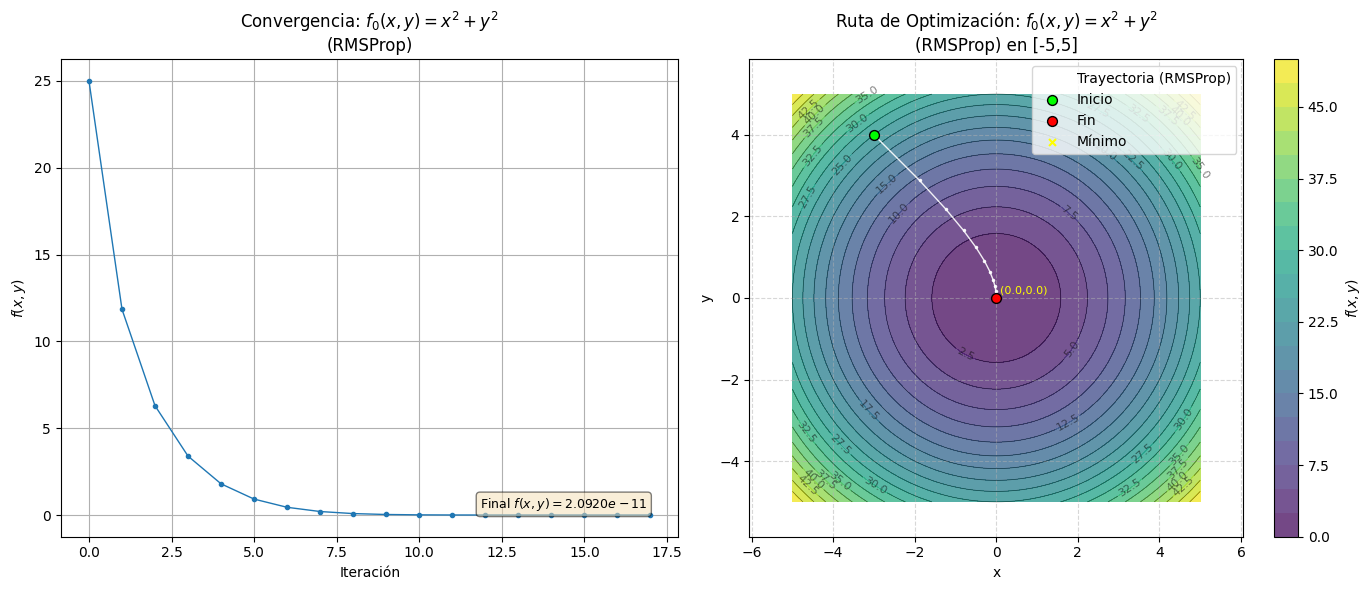


Last point (x, y):	(0.000, 0.000)
Expected point (x, y):	(0.000, 0.000)

** test_1: PASSED!


In [417]:
# Para f0, prueba desde (-3, 4), mínimo global: (0,0)
test_1_settings = {
  'optimizer_params': {
    'func_to_optimize': funcs_pytorch_labels[0][0],
    'derivative_func': funcs_pytorch_labels[0][1],
    'initial_params': torch.tensor([[-3.0, 4.0]], requires_grad=False),
    'learning_rate': 0.5,
    'N': P,
    'gamma': 0.8,
    'epsilon': 1e-8,
    'history_params_x': [],
    'history_fx': [],
    'verbose': True
  },
  'expected_x_y': [(0.0, 0.0)],
  'test_tolerance': 1e-2,
  'plot': {
    'func_name_str':funcs_pytorch_labels[0][2],
    'optimizer_name_str': "RMSProp",
    'plot_range': (-5, 5),
    'mark_points': [(0, 0)],
    'points_label': 'Mínimo',
  }
}

test("test_1", **test_1_settings)

Initial: params_t = (tensor([[-3.,  4.]])), f(params_t) = 10.1386
Iter 10/100: f(-0.01625192165374756,	-0.2631913423538208)	=	1.8726310729980469,	grad=[tensor([[2.4242, 2.1378]])]
Iter 20/100: f(-0.15500256419181824,	1.0784211158752441)	=	3.5165634155273438,	grad=[tensor([[ 1.4147, -2.2055]])]
Iter 30/100: f(-0.005982398986816406,	-0.06276743859052658)	=	0.28082275390625,	grad=[tensor([[-4.5563,  1.2190]])]
Iter 40/100: f(0.3191274404525757,	-0.15789739787578583)	=	2.635326385498047,	grad=[tensor([[-5.4774,  3.1868]])]
Iter 50/100: f(-0.052115947008132935,	-0.05061782896518707)	=	0.34125518798828125,	grad=[tensor([[5.9140, 3.6743]])]
Iter 60/100: f(-0.10733464360237122,	-0.06635002791881561)	=	0.7377166748046875,	grad=[tensor([[7.0353, 3.5038]])]
Iter 70/100: f(-0.0951336920261383,	-0.10541537404060364)	=	0.8734245300292969,	grad=[tensor([[6.0548, 5.1138]])]
Iter 80/100: f(-0.10682092607021332,	-0.07767653465270996)	=	0.7877883911132812,	grad=[tensor([[6.5834, 4.3081]])]
Iter 90/100: f

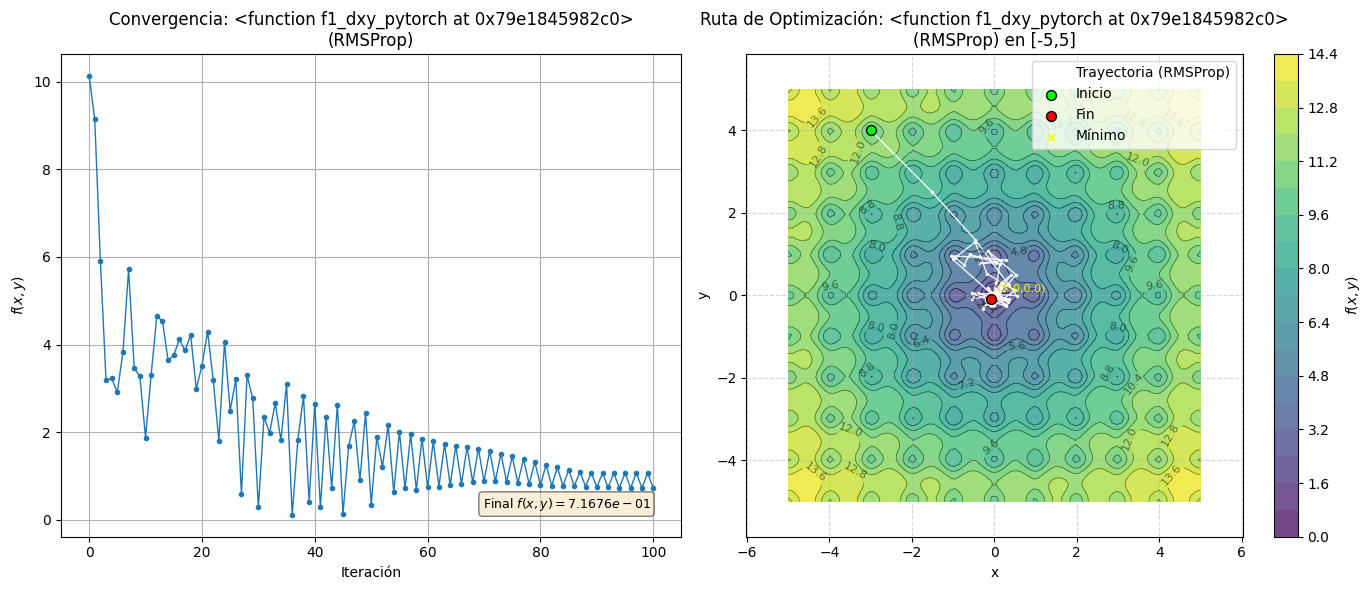


Last point (x, y):	(-0.079, -0.095)
Expected point (x, y):	(-0.079, -0.095)

** test_2: PASSED!


In [347]:
# Ackley (f1), prueba desde (-3, 4), mínimo global: (0,0)
test_2_settings = {
  'optimizer_params': {
    'func_to_optimize': funcs_pytorch_labels[1][0],
    'derivative_func': funcs_pytorch_labels[1][1],
    'initial_params': torch.tensor([[-3.0, 4.0]], requires_grad=False),
    'learning_rate': 0.15,
    'N': P,
    'gamma': 0.99,
    'epsilon': 1e-3,
    'history_params_x': [],
    'history_fx': [],
    'verbose': True
  },
  'expected_x_y': [(-0.079, -0.095)],
  'test_tolerance': 1e-2,
  'plot': {
    'func_name_str':funcs_pytorch_labels[1][1],
    'optimizer_name_str': "RMSProp",
    'plot_range': (-5, 5),
    'mark_points': [(0, 0)],
    'points_label': 'Mínimo',
  }
}

test("test_2", **test_2_settings)

Initial: params_t = (tensor([[ 0., -1.]])), f(params_t) = 180.0000
Iter 10/100: f(2.829317092895508,	1.8397281169891357)	=	1.9524976015090942,	grad=[tensor([[-23.8281, -13.4575]])]
Iter 20/100: f(2.9998581409454346,	2.00020432472229)	=	8.739771146792918e-07,	grad=[tensor([[-0.0181,  0.0116]])]

*** Iter 23: CONVERGIO! en f(2.9999990463256836,	2.0000009536743164)	=	3.092281986027956e-11...



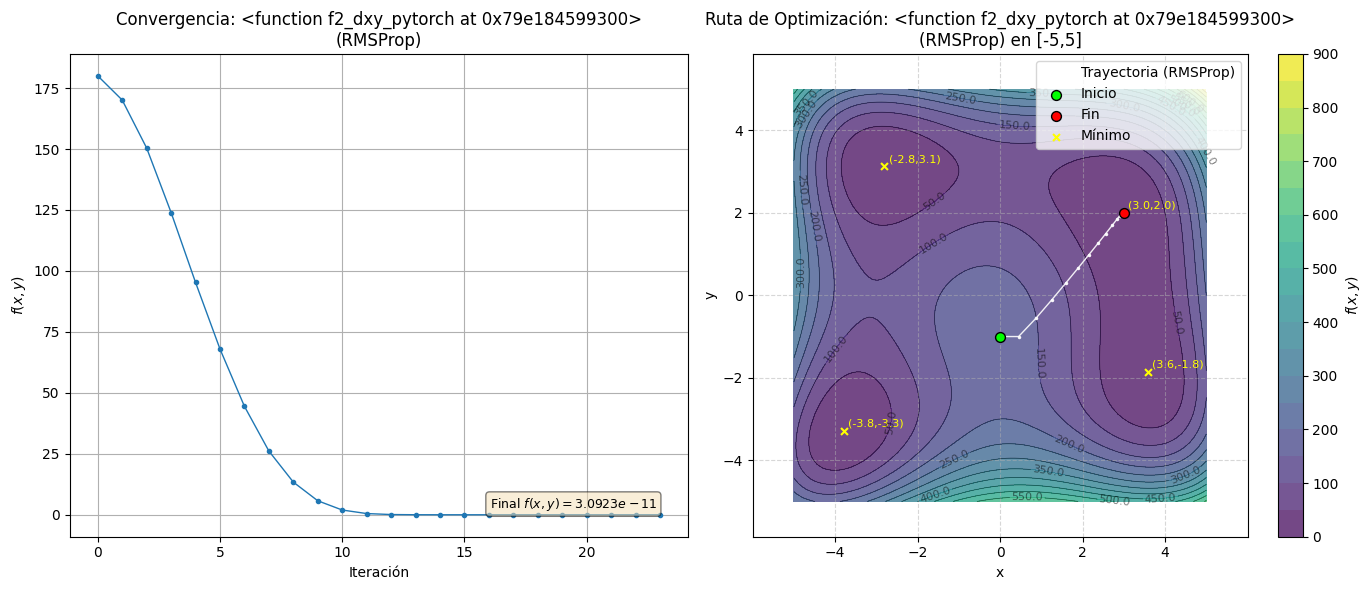


Last point (x, y):	(3.000, 2.000)
Expected point (x, y):	(3.000, 2.000)

** test_3: PASSED!


In [348]:
# Para Himmelblau (f2), Prueba (-1,-1), Mínimos (3,2), (-2.805, 3.131), (-3.779, -3.283) y (3.584, -1.848)
test_3_settings = {
  'optimizer_params': {
    'func_to_optimize': funcs_pytorch_labels[2][0],
    'derivative_func': funcs_pytorch_labels[2][1],
    'initial_params': torch.tensor([[0.0, -1.0]], requires_grad=False),
    'learning_rate': 0.2,
    'N': P,
    'gamma': 0.8,
    'epsilon': 1e-8,
    'history_params_x': [],
    'history_fx': [],
    'verbose': True
  },
  'expected_x_y': [(3, 2), (-2.805, 3.131), (-3.779, -3.283), (3.584, -1.848)],
  'test_tolerance': 1e-1,
  'plot': {
    'func_name_str':funcs_pytorch_labels[2][1],
    'optimizer_name_str': "RMSProp",
    'plot_range': (-5, 5),
    'mark_points': [(3, 2), (-2.805, 3.131), (-3.779, -3.283), (3.584, -1.848)],
    'points_label': 'Mínimo',
  }
}

test("test_3", **test_3_settings)

### a) Calibración (utilizando Optuna para RMSProp)

In [425]:
P = 500 # Cantidad de iteraciones
epsilon = 1e-8
min_lr = 1e-1
max_lr = 1.0
min_gamma = 0.5
max_gamma = 0.999

def random_point():
  x = random.uniform(-10, 10)
  y = random.uniform(-10, 10)
  return torch.tensor([[x, y]], requires_grad=False)

# metrica RMSE
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2))


def objective_rms_prop_f0(trial):
  """!
  @brief Función objetivo para Optuna para calibrar RMSprop. # Función Objetivo para Optuna

  @param trial de Optuna, configura los hiperparámetros.
  @return Valor de la función objetivo, métrica a optimizar.
  """
  lr = trial.suggest_float('lr', min_lr, max_lr, log=True)
  gamma = trial.suggest_float('gamma', min_gamma, max_gamma, log=True)

  # Parámetros fijos
  iterations = P
  history_params_x = []

  final_value = rmsprop(**{
    'func_to_optimize': funcs_pytorch_labels[0][0],  #f0
    'derivative_func': funcs_pytorch_labels[0][1],
    'initial_params': random_point(),
    'learning_rate': lr,
    'N': iterations,
    'gamma': gamma,
    'epsilon': epsilon,
    'history_params_x': history_params_x
  })

  return final_value


def objective_rms_prop_f1(trial):
  """!
  @brief Función objetivo para Optuna para calibrar RMSprop. # Función Objetivo para Optuna

  @param trial de Optuna, configura los hiperparámetros.
  @return Valor de la función objetivo, métrica a optimizar.
  """
  lr = trial.suggest_float('lr', min_lr, max_lr, log=True)
  gamma = trial.suggest_float('gamma', min_gamma, max_gamma, log=True)

  # Parámetros fijos
  iterations = P
  history_params_x = []

  final_value = rmsprop(**{
    'func_to_optimize': funcs_pytorch_labels[1][0],  # f_1
    'derivative_func': funcs_pytorch_labels[1][1],
    'initial_params': random_point(),
    'learning_rate': lr,
    'N': iterations,
    'gamma': gamma,
    'epsilon': epsilon,
    'history_params_x': history_params_x
  })

  return final_value

def objective_rms_prop_f2(trial):
  """!
  @brief Función objetivo para Optuna para calibrar RMSprop. # Función Objetivo para Optuna

  @param trial de Optuna, configura los hiperparámetros.
  @return Valor de la función objetivo, métrica a optimizar.
  """
  lr = trial.suggest_float('lr', min_lr, max_lr, log=True)
  gamma = trial.suggest_float('gamma', min_gamma, max_gamma, log=True)

  # Parámetros fijos
  iterations = P
  history_params_x = []

  final_value = rmsprop(**{
    'func_to_optimize': funcs_pytorch_labels[2][0],  # f_2
    'derivative_func': funcs_pytorch_labels[2][1],
    'initial_params': random_point(),
    'learning_rate': lr,
    'N': iterations,
    'gamma': gamma,
    'epsilon': epsilon,
    'history_params_x': history_params_x
  })

  return final_value

#### Estudio de Optuna

In [426]:
# Estudio de Optuna
trials = 1000

def perform_study(function_to_optimize, study_name, trials=100, direction='minimize'):
  study_f = optuna.create_study(direction=direction, study_name=study_name)
  study_f.optimize(function_to_optimize, n_trials=trials, show_progress_bar=True) # Ajusta n_trials según sea necesario
  return study_f.best_trial

best_trial_f0 = perform_study(objective_rms_prop_f0, "rms_prop_f0_optimization", trials=trials)
best_trial_f1 = perform_study(objective_rms_prop_f1, "rms_prop_f1_optimization", trials=trials)
best_trial_f2 = perform_study(objective_rms_prop_f2, "rms_prop_f2_optimization", trials=trials)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

#### Valores obtenidos en la Calibración

In [428]:
rmsprop_optimization_best_values = []
for key, value in best_trial_f0.params.items():
    rmsprop_optimization_best_values.append(["f0", key, value])
for key, value in best_trial_f1.params.items():
    rmsprop_optimization_best_values.append(["f1", key, value])
for key, value in best_trial_f2.params.items():
    rmsprop_optimization_best_values.append(["f2", key, value])

rmsprop_optimization_best_values = pd.DataFrame(rmsprop_optimization_best_values,
                                                columns=["Funcion", "Hiperparametro", "mejor_valor"])
rmsprop_optimization_best_values

Funcion Hiperparametro  mejor_valor
0      f0             lr     0.234842
1      f0          gamma     0.740521
2      f1             lr     0.454180
3      f1          gamma     0.535169
4      f2             lr     0.959218
5      f2          gamma     0.791453

In [429]:
# # Gráfica de importancia de los hiperparámetros: muestra qué hiperparámetros tuvieron el mayor impacto.
fig_param_importances = optuna.visualization.plot_param_importances(study_rms_prop_f0)
fig_param_importances.show()
# # fig_param_importances.write_image("rms_prop_f0_importance.png")

In [25]:
# # Gráfica del historial de optimización: muestra cómo mejora el valor objetivo con cada trial.
# fig_history = optuna.visualization.plot_optimization_history(study_rms_prop_f0)
# fig_history.show() # Para mostrar en un entorno interactivo como Jupyter
# # fig_history.write_image("rms_prop_f0_history.png")

In [26]:
# # Gráfica de coordenadas paralelas: muestra cómo diferentes combinaciones de hiperparámetros afectan el resultado.
# fig_parallel_coordinate = optuna.visualization.plot_parallel_coordinate(study_rms_prop_f0)
# fig_parallel_coordinate.show()
# # fig_parallel_coordinate.write_image("rms_prop_f0_parallel.png")

In [27]:
# fig_slice = optuna.visualization.plot_slice(study_rms_prop_f0)
# fig_slice.show()
# # fig_slice.write_image("rms_prop_f0_slice.png")

In [28]:
# # Gráfica de contorno (slice plot): muestra la relación entre pares de hiperparámetros.
# optuna.visualization.plot_contour(study_rms_prop_f0, params=['lr', 'gamma'])
# # fig_slice.write_image("rms_prop_f0_contour.png")

### b) Realice lo anterior para el algoritmo del descenso del gradiente (SGD).

In [430]:
def sgd(func_to_optimize, derivative_func, initial_params, learning_rate=0.1, N=100, epsilon=1e-8, history_params_x=[],
        history_fx=[], verbose=False):
  """!
  @brief Implementa el algoritmo clásico de Descenso de Gradiente usando PyTorch
         para optimizar una función de dos variables f(x,y), aceptando
         hiperparámetros y opciones de control vía kwargs.

  @param func_to_optimize La función a optimizar. Debe tomar dos tensores de PyTorch (x, y) y devolver un tensor.
  @param func_to_optimize (callable): La función a optimizar.
  @param derivative_func (callable): La derivada de la función a optimizar.
  @param params_t (Tensor, opcional): Tensor (x_init, y_init) con los valores iniciales.
  @param learning_rate (float, opcional): Tasa de aprendizaje (alpha).
                                          Por defecto: 0.01.
  @param N (int, opcional): Número de iteraciones.
                            Por defecto: 100.
  @param epsilon (float, opcional): Pequeño valor para evitar la división por cero.
                                    Por defecto: 1e-8.
  @param history_params_x (list, opcional): Lista de tuplas (x,y) que representan la trayectoria de los parámetros.
                                            Por defecto: [].
  @param history_fx (list, opcional): Lista de los valores de la función f(x,y) en cada iteración.
                                      Por defecto: [].
  @param verbose (bool, opcional): Si True, imprime información durante la ejecución.
                                Por defecto: False.

  @return Valor final de la funcion a optimizar.
  """
  params_t = initial_params.clone()
  current_f_val = torch.sum(func_to_optimize(params_t)).item()

  history_params_x.append((params_t[:, 0].item(), params_t[:, 1].item()))
  history_fx.append(current_f_val)

  if verbose:
    print(f"Initial: params_t = ({params_t}), f(params_t) = {current_f_val:.4f}")

  for i in range(N):
    grad = derivative_func(params_t)
    params_t -= learning_rate * grad

    # Guarda historial
    x_updated, y_updated = params_t[:, 0], params_t[:, 1]
    history_params_x.append((x_updated.item(), y_updated.item()))

    updated_f_val = torch.sum(func_to_optimize(params_t)).item()
    history_fx.append(updated_f_val)

    if verbose and (i + 1) % (N // 10 if N >= 10 else 1) == 0 or N < 10:
      print(f"Iter {i+1}/{N}: f({x_updated.item()},\t{y_updated.item()})\t=\t{updated_f_val},\tgrad=[{grad}]")

    if np.abs(current_f_val - updated_f_val) < epsilon:
      if verbose:
        print(f"\n*** Iter {i+1}: CONVERGIO! en f({x_updated.item()},\t{y_updated.item()})\t=\t{updated_f_val}...\n")
      break
    current_f_val = updated_f_val

  return current_f_val

# Smoke test
history_params_test = []
# Smoke test
print("f(x,y):", sgd(**{
  'func_to_optimize': lambda x: x**2,
  'derivative_func': lambda x: 2*x,
  'initial_params': torch.tensor([[-3.0, 4.0]], dtype=torch.float32, requires_grad=False),
  'learning_rate': 0.1,
  'N': 100,
  'history_params_x': history_params_test,
  'history_fx': [],
  'verbose': True
}), "| (x,y):", history_params_test[-1], "| iteraciones:", len(history_params_test)-1)
del(history_params_test)

Initial: params_t = (tensor([[-3.,  4.]])), f(params_t) = 25.0000
Iter 10/100: f(-0.32212257385253906,	0.4294966757297516)	=	0.28823035955429077,	grad=[tensor([[-0.8053,  1.0737]])]
Iter 20/100: f(-0.03458765149116516,	0.04611685872077942)	=	0.003323070239275694,	grad=[tensor([[-0.0865,  0.1153]])]
Iter 30/100: f(-0.003713820595294237,	0.004951760172843933)	=	3.831239155260846e-05,	grad=[tensor([[-0.0093,  0.0124]])]
Iter 40/100: f(-0.00039876840310171247,	0.0005316912429407239)	=	4.417117906996282e-07,	grad=[tensor([[-0.0010,  0.0013]])]

*** Iter 48: CONVERGIO! en f(-6.690224108751863e-05,	8.920299296732992e-05)	=	1.243308389575759e-08...

f(x,y): 1.9426693143032026e-08 | (x,y): (-6.690224108751863e-05, 8.920299296732992e-05) | iteraciones: 48


#### Unit tests de `sdg`

Initial: params_t = (tensor([[-3.,  4.]])), f(params_t) = 25.0000

*** Iter 2: CONVERGIO! en f(0.0,	0.0)	=	0.0...



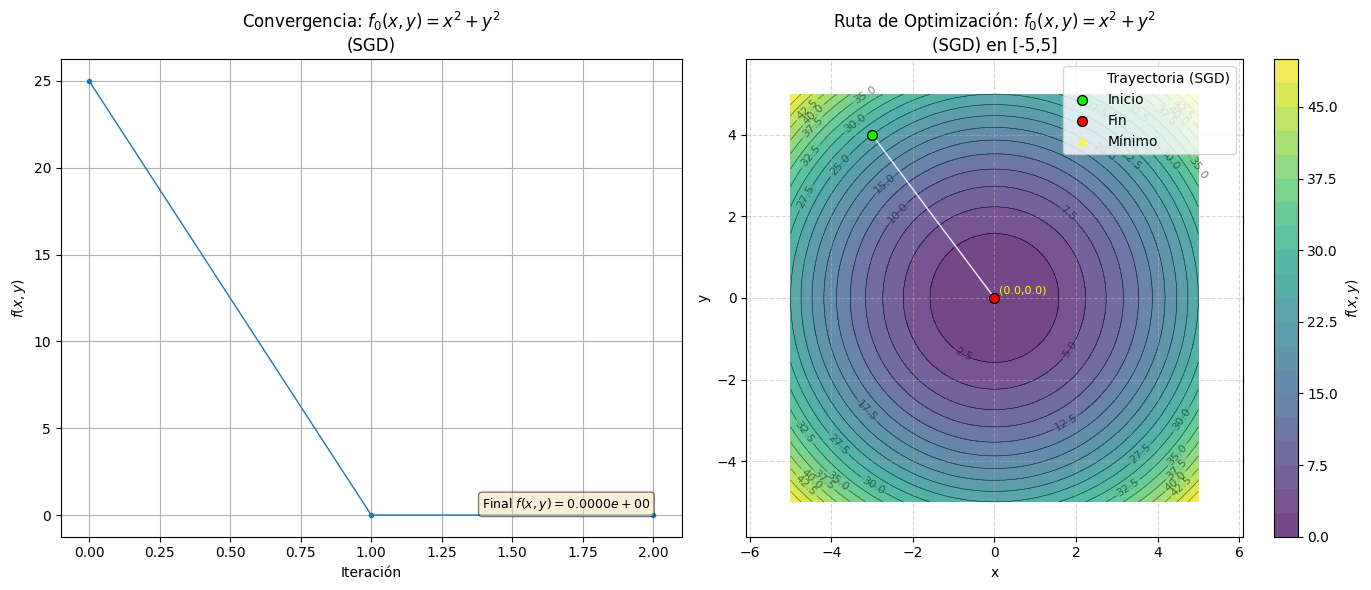


Last point (x, y):	(0.000, 0.000)
Expected point (x, y):	(0.000, 0.000)

** test_1: PASSED!


In [431]:
P = 100
# Para f0, prueba desde (-3, 4), mínimo global: (0,0)
test_1_settings = {
  'optimizer_params': {
    'func_to_optimize': funcs_pytorch_labels[0][0],
    'derivative_func': funcs_pytorch_labels[0][1],
    'initial_params': torch.tensor([[-3.0, 4.0]], dtype=torch.float32, requires_grad=False),
    'learning_rate': 0.5,
    'N': P,
    'history_params_x': [],
    'history_fx': [],
    'verbose': True
  },
  'expected_x_y': [(0.0, 0.0)],
  'test_tolerance': 1e-8,
  'plot': {
    'func_name_str':funcs_pytorch_labels[0][2],
    'optimizer_name_str': "SGD",
    'plot_range': (-5, 5),
    'mark_points': [(0, 0)],
    'points_label': 'Mínimo',
  }
}

test("test_1", optimizer=sgd, **test_1_settings)


Initial: params_t = (tensor([[-3.,  4.]])), f(params_t) = 10.1386
Iter 10/100: f(-2.234421968460083,	3.8993465900421143)	=	10.553921699523926,	grad=[tensor([[-1.6076, -0.7597]])]
Iter 20/100: f(-0.4048358201980591,	3.8729536533355713)	=	10.249638557434082,	grad=[tensor([[-6.1507,  0.8089]])]
Iter 30/100: f(0.8834102153778076,	3.9036202430725098)	=	9.174976348876953,	grad=[tensor([[-1.8171, -0.8845]])]
Iter 40/100: f(0.9764337539672852,	3.8252527713775635)	=	9.215852737426758,	grad=[tensor([[-2.0797, -0.8234]])]
Iter 50/100: f(0.248235821723938,	2.715364456176758)	=	8.214936256408691,	grad=[tensor([[1.3983, 3.3102]])]
Iter 60/100: f(-0.05289837718009949,	2.8598520755767822)	=	7.166674613952637,	grad=[tensor([[ 2.5779, -1.2373]])]
Iter 70/100: f(-0.5647598505020142,	2.7662878036499023)	=	8.637334823608398,	grad=[tensor([[5.8746, 1.7420]])]
Iter 80/100: f(0.0850367546081543,	2.7679972648620605)	=	7.572324752807617,	grad=[tensor([[2.3827, 1.7083]])]
Iter 90/100: f(0.4419463574886322,	0.793

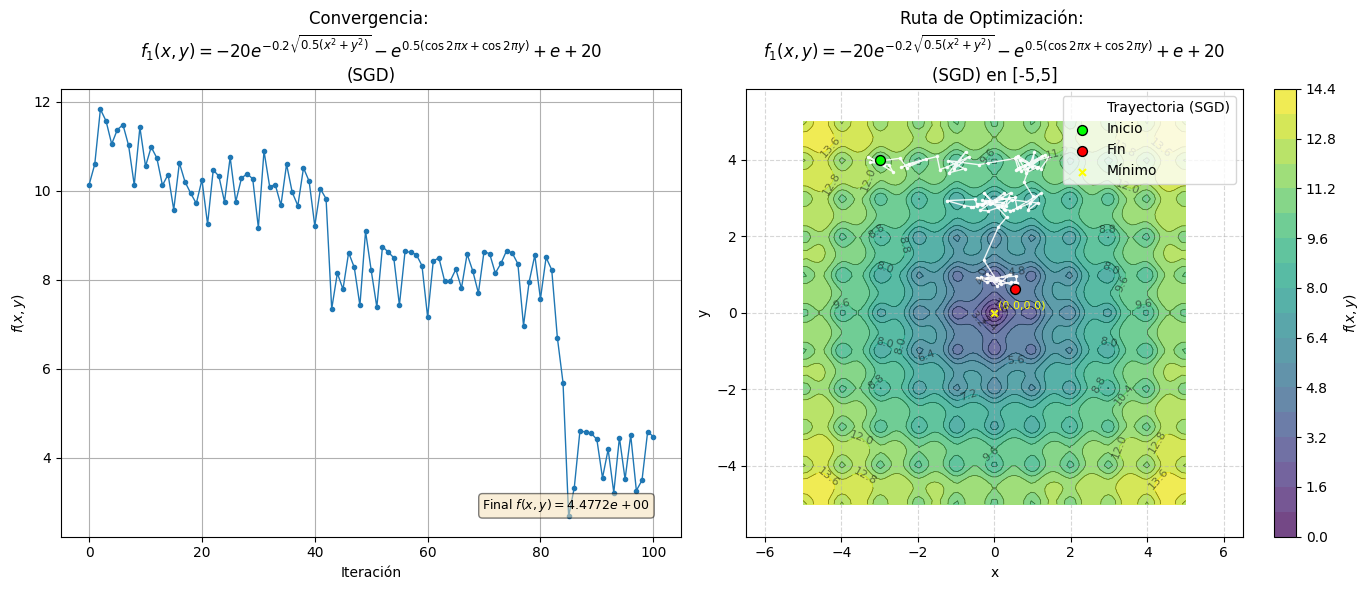


Last point (x, y):	(0.527, 0.630)
Expected point (x, y):	(0.527, 0.630)

** test_2: PASSED!


In [420]:
# Ackley (f1), prueba desde (-3, 4), mínimo global: (0,0)
test_2_settings = {
  'optimizer_params': {
    'func_to_optimize': funcs_pytorch_labels[1][0],
    'derivative_func': funcs_pytorch_labels[1][1],
    'initial_params': torch.tensor([[-3.0, 4.0]], dtype=torch.float32, requires_grad=False),
    'learning_rate': 0.13,
    'N': P,
    'history_params_x': [],
    'history_fx': [],
    'verbose': True
  },
  'expected_x_y': [(0.527, 0.630)],
  'test_tolerance': 1e-2,
  'plot': {
    'func_name_str': '\n'+funcs_pytorch_labels[1][2],
    'optimizer_name_str': "SGD",
    'plot_range': (-5, 5),
    'mark_points': [(0, 0)],
    'points_label': 'Mínimo',
  }
}

test("test_2", optimizer=sgd, **test_2_settings)

Initial: params_t = (tensor([[ 0., -1.]])), f(params_t) = 180.0000

*** Iter 30: CONVERGIO! en f(3.584238290786743,	-1.8460447788238525)	=	6.261615635594353e-05...



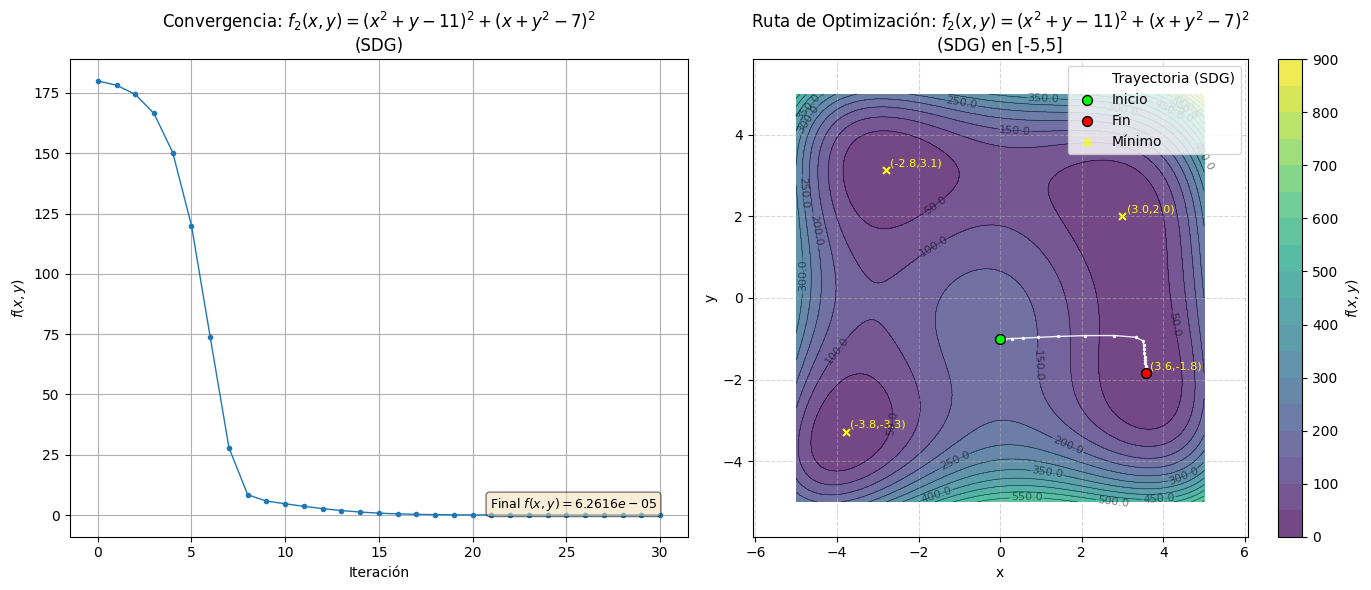


Last point (x, y):	(3.584, -1.846)
Expected point (x, y):	(3.000, 2.000)
Expected point (x, y):	(-2.805, 3.131)
Expected point (x, y):	(-3.779, -3.283)
Expected point (x, y):	(3.584, -1.848)

** test_3: PASSED!


In [463]:
# Para Himmelblau (f2), Prueba (-1,-1), Mínimos (3,2), (-2.805, 3.131), (-3.779, -3.283) y (3.584, -1.848)
test_3_settings = {
  'optimizer_params': {
    'func_to_optimize': funcs_pytorch_labels[2][0],
    'derivative_func': funcs_pytorch_labels[2][1],
    'initial_params': torch.tensor([[0.0, -1.0]], dtype=torch.float32, requires_grad=False),
    'learning_rate': 0.01,
    'N': P,
    'epsilon': 1e-4,
    'history_params_x': [],
    'history_fx': [],
    'verbose': True
  },
  'expected_x_y': [(3, 2), (-2.805, 3.131), (-3.779, -3.283), (3.584, -1.848)],
  'test_tolerance': 1e-1,
  'plot': {
    'func_name_str':funcs_pytorch_labels[2][2],
    'optimizer_name_str': "SDG",
    'plot_range': (-5, 5),
    'mark_points': [(3, 2), (-2.805, 3.131), (-3.779, -3.283), (3.584, -1.848)],
    'points_label': 'Mínimo',
  }
}

test("test_3", optimizer=sgd, **test_3_settings)

#### Calibración (utilizando Optuna para SGD)

In [469]:
P = 500 # Cantidad de iteraciones
epsilon = 1e-8
min_lr = 1e-1
max_lr = 1.0

def objective_sgd_f0(trial):
  """!
  @brief Función objetivo para Optuna para calibrar SGD.

  @param trial de Optuna, configura los hiperparámetros.
  @return Valor de la función objetivo, métrica a optimizar.
  """
  lr = trial.suggest_float('lr', min_lr, max_lr, log=True)

  # Parámetros fijos
  iterations = P

  final_value = sgd(**{
    'func_to_optimize': funcs_pytorch_labels[0][0],  # f_0
    'derivative_func': funcs_pytorch_labels[0][1],
    'initial_params': random_point(),
    'learning_rate': lr,
    'N': iterations,
    'epsilon': epsilon,
  })

  return final_value

def objective_sgd_f1(trial):
  """!
  @brief Función objetivo para Optuna para calibrar SGD.

  @param trial de Optuna, configura los hiperparámetros.
  @return Valor de la función objetivo, métrica a optimizar.
  """
  lr = trial.suggest_float('lr', min_lr, max_lr, log=True)

  # Parámetros fijos
  iterations = P

  final_value = sgd(**{
    'func_to_optimize': funcs_pytorch_labels[1][0],  # f_1
    'derivative_func': funcs_pytorch_labels[1][1],
    'initial_params': random_point(),
    'learning_rate': lr,
    'N': iterations,
  })

  return final_value


def objective_sgd_f2(trial):
  """!
  @brief Función objetivo para Optuna para calibrar SGD.

  @param trial de Optuna, configura los hiperparámetros.
  @return Valor de la función objetivo, métrica a optimizar.
  """
  lr = trial.suggest_float('lr', 1e-3, 0.2, log=True)

  # Parámetros fijos
  iterations = P

  final_value = sgd(**{
    'func_to_optimize': funcs_pytorch_labels[2][0],  # f_2
    'derivative_func': funcs_pytorch_labels[2][1],
    'initial_params': random_point(),
    'learning_rate': lr,
    'N': iterations,
    'epsilon': epsilon,
  })

  return final_value


##### Estudio de Optuna

In [471]:
optuna.logging.set_verbosity(optuna.logging.ERROR)
trials = 1000
# Estudio de Optuna
def perform_study(function_to_optimize, study_name, trials=100, direction='minimize'):
  study_f = optuna.create_study(direction=direction, study_name=study_name)
  study_f.optimize(function_to_optimize, n_trials=trials, show_progress_bar=True) # Ajusta n_trials según sea necesario
  return study_f.best_trial

sgd_best_trial_f0 = perform_study(objective_sgd_f0, "sgd_f0_optimization", trials)
sgd_best_trial_f1 = perform_study(objective_sgd_f1, "sgd_f1_optimization", trials)
sgd_best_trial_f2 = perform_study(objective_sgd_f2, "sgd_f2_optimization", trials)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [472]:
sgd_optimization_best_values = []
for key, value in sgd_best_trial_f0.params.items():
    sgd_optimization_best_values.append(["f0", key, value])
for key, value in sgd_best_trial_f1.params.items():
    sgd_optimization_best_values.append(["f1", key, value])
for key, value in sgd_best_trial_f2.params.items():
    sgd_optimization_best_values.append(["f2", key, value])

sgd_optimization_best_values = pd.DataFrame(sgd_optimization_best_values,
                                            columns=["Funcion", "Hiperparametro", "mejor_valor"])
sgd_optimization_best_values

Funcion Hiperparametro  mejor_valor
0      f0             lr     0.499994
1      f1             lr     0.113072
2      f2             lr     0.008765

### c) ¿Porqué el algoritmo RMS prop es más efectivo en evitar atascarse en puntos silla que el algoritmo del descenso del gradiente?

TODO

### d) Para los mejores valores encontrados, en cada funcion, por un máximo de 50 iteraciones (para el algoritmo del descenso del gradiente, y RMS prop):


  *    1) Ejecute el algoritmo 10 corridas diferentes, y documente en una tabla la cantidad de iteraciones para converger a el o los puntos minimos (indique si convergió).
  *    2) Muestre el valor promedio de la función minimizada para las 10 corridas, y la cantidad de iteraciones promedio en converger.

In [184]:
run_history = {
  'optimizer': [],
  'function': [],
  'converged_run': [],
  'best_run_iterations': [],
  'best_history_params_x': [],
  'best_history_fx': [],
  'best_initial_point': [],
  'best_last_point': [],
  'average_last_point': [],
  'average_iterations': [],
}

# Valores fijos
P = 50
test_tolerance = 1e-2
epsilon= 1e-4


def evaluate_optimizer(func_name, func_to_optimize, derivative_func, optimizer_name, optimizer, minimos, test_points,
                       run_history = run_history, epsilon=epsilon, test_tolerance=test_tolerance, epochs=P,
                       lr=0.01, gamma=0.99):
  hist_iterations = []
  hist_converged = []
  history_final_point = []

  best_run_history_params_x = None
  best_run_history_fx = None
  best_run_iterations = float('inf')
  best_final_point = None
  best_initial_point = None

  i = 1
  for point in test_points:
    #clone the point
    initial_point = point.clone()
    # print(f"\nCorrida {i}, {func_name}({point})")
    i += 1

    history_params_x = []
    history_fx= []

    final_point = optimizer(**{
      'func_to_optimize': func_to_optimize,
      'derivative_func': derivative_func,
      'initial_params': initial_point,
      'learning_rate': lr,
      'N': epochs,
      'gamma': gamma,
      'epsilon': epsilon,
      'history_params_x': history_params_x,
      'history_fx': history_fx,
      'verbose': False,
    })

    last_iteration = len(history_params_x)
    converged = last_iteration < epochs
    hist_iterations.append(last_iteration)
    hist_converged.append(converged)
    history_final_point.append(tuple(final_point.squeeze(0).tolist()))

    if best_run_iterations > last_iteration and converged:
      best_run_iterations = last_iteration
      best_run_history_params_x = history_params_x
      best_run_history_fx = history_fx
      best_initial_point = point.clone()
      best_final_point = final_point.clone()


  runs_df = pd.DataFrame({
      'Iteraciones': hist_iterations,
      'Convergio': hist_converged,
      'Punto Final': history_final_point,
  })
  print(runs_df)

  run_history['optimizer'].append(optimizer_name)
  run_history['function'].append(func_name)
  run_history['average_last_point'].append(np.mean(np.asarray(history_final_point), axis=0).tolist())
  run_history['average_iterations'].append(np.mean(np.asarray(hist_iterations)).tolist())
  run_history['best_run_iterations'].append(best_run_iterations)
  run_history['best_last_point'].append(best_final_point)
  run_history['best_initial_point'].append(best_initial_point)
  run_history['converged_run'].append(hist_converged)
  run_history['best_history_params_x'].append(best_run_history_params_x)
  run_history['best_history_fx'].append(best_run_history_fx)


In [185]:
NUMBER_OF_TEST_POINTS = 10
test_points = [random_point() for _ in range(NUMBER_OF_TEST_POINTS)]
test_points

[tensor([[-6.7369, -5.3059]]),
 tensor([[-7.8505,  2.7263]]),
 tensor([[-6.1109, -0.7570]]),
 tensor([[-5.7876, -3.2556]]),
 tensor([[-6.9972,  5.9572]]),
 tensor([[9.5554, 5.8259]]),
 tensor([[6.3482, 4.7652]]),
 tensor([[7.8072, 1.5313]]),
 tensor([[1.3487, 0.6280]]),
 tensor([[-5.6441, -3.2969]])]

#### RMSProp, $f_0$ (10 corridas, mejores hiperparámetros)

In [186]:
_f_name = 'f0'
rmsprop_optimization_best_values[rmsprop_optimization_best_values["Funcion"] == _f_name]

Funcion Hiperparametro  mejor_valor
0      f0             lr     0.124221
1      f0          gamma     0.992411

In [187]:
evaluate_optimizer(**{
  'func_name': _f_name,
  'func_to_optimize': funcs_pytorch_labels[0][0],
  'derivative_func': funcs_pytorch_labels[0][1],
  'optimizer_name': 'RMSProp',
  'optimizer': rmsprop,
  'minimos': [(0.0, 0.0)],
  'lr': rmsprop_optimization_best_values[rmsprop_optimization_best_values["Funcion"] == _f_name]['mejor_valor'].iloc[0],
  'gamma': rmsprop_optimization_best_values[rmsprop_optimization_best_values["Funcion"] == _f_name]['mejor_valor'].iloc[1],
  'test_points': test_points,
})

run_history_pd = pd.DataFrame(run_history)
run_history_pd

   Iteraciones  Convergio                                        Punto Final
0           51      False   (-0.005876583978533745, -0.00013778226275462657)
1           51      False     (-0.03348812833428383, 1.7879050748448788e-15)
2           51      False  (-0.0015138272428885102, -2.2114383832518556e-16)
3           51      False  (-0.0006431459914892912, -4.7123551588645896e-11)
4           51      False     (-0.009419904090464115, 0.0010234153596684337)
5           51      False       (0.18311408162117004, 0.0007166055729612708)
6           51      False    (0.0026388256810605526, 1.4536666640196927e-05)
7           51      False                         (0.03167087584733963, 0.0)
8           13       True   (5.3461412814065357e-14, 1.1877913493663073e-05)
9           51      False  (-0.00042159933946095407, -8.459207639921473e-11)


optimizer function                                      converged_run  \
0   RMSProp       f0  [False, False, False, False, False, False, Fal...   

   best_run_iterations                              best_history_params_x  \
0                   13  [(1.348724126815796, 0.6280278563499451), (-0....   

                                     best_history_fx  \
0  [2.2134757041931152, 0.6405483484268188, 0.105...   

                   best_initial_point  \
0  [[tensor(1.3487), tensor(0.6280)]]   

                              best_last_point  \
0  [[tensor(5.3461e-14), tensor(1.1878e-05)]]   

                               average_last_point  average_iterations  
0  [0.016606059417250324, 0.00016286531182948768]                47.2

#### SGD, $f_0$ (10 corridas, mejores hiperparámetros)

In [179]:
_f_name = 'f0'
sgd_optimization_best_values[sgd_optimization_best_values["Funcion"] == _f_name]

Funcion Hiperparametro  mejor_valor
0      f0             lr     0.055884

In [180]:
test_points

[tensor([[1.9333, 7.2318]]),
 tensor([[ 2.8700, -5.6407]]),
 tensor([[-0.7363, -6.4922]]),
 tensor([[ 1.3034, -4.7727]]),
 tensor([[-7.3442, -8.0559]]),
 tensor([[ 1.1172, -0.2232]]),
 tensor([[-8.1261,  1.5827]]),
 tensor([[ 7.9504, -3.7854]]),
 tensor([[-6.0487,  6.1849]]),
 tensor([[-2.6973, -0.9611]])]

In [181]:
evaluate_optimizer(**{
  'func_name': _f_name,
  'func_to_optimize': funcs_pytorch_labels[0][0],
  'derivative_func': funcs_pytorch_labels[0][1],
  'optimizer_name': 'SGD',
  'optimizer': sgd,
  'minimos': [(0.0, 0.0)],
  'lr': rmsprop_optimization_best_values[rmsprop_optimization_best_values["Funcion"] == _f_name]['mejor_valor'].iloc[0],
  'test_points': test_points,
})

run_history_pd = pd.DataFrame(run_history)
run_history_pd

   Iteraciones  Convergio                                        Punto Final
0           44       True     (8.967409485194366e-06, 3.354409273015335e-05)
1           43       True   (1.7713038687361404e-05, -3.481276871752925e-05)
2           44       True  (-3.4153295018768404e-06, -3.0113707907730713e...
3           43       True     (8.04442879598355e-06, -2.945579581137281e-05)
4           44       True   (-3.406539690331556e-05, -3.736694998224266e-05)
5           38       True    (2.875554491765797e-05, -5.744394002249464e-06)
6           45       True   (-2.8327865948085673e-05, 5.517411864275346e-06)
7           44       True    (3.687720527523197e-05, -1.755829362082295e-05)
8           44       True  (-2.8056463634129614e-05, 2.8688007660093717e-05)
9           41       True   (-2.947215034510009e-05, -1.050190803653095e-05)


optimizer function                                      converged_run  \
0   RMSProp       f0  [True, True, True, True, True, True, True, Tru...   
1       SGD       f0  [True, True, True, True, True, True, True, Tru...   

   best_run_iterations                              best_history_params_x  \
0                   10  [(1.1171802282333374, -0.22317519783973694), (...   
1                   38  [(1.1171802282333374, -0.22317519783973694), (...   

                                     best_history_fx  \
0  [1.2978988885879517, 1.532896876335144, 0.0461...   
1  [1.2978988885879517, 0.7331031560897827, 0.414...   

                    best_initial_point  \
0  [[tensor(1.1172), tensor(-0.2232)]]   
1  [[tensor(1.1172), tensor(-0.2232)]]   

                               best_last_point  \
0  [[tensor(-4.4606e-06), tensor(8.2910e-07)]]   
1  [[tensor(2.8756e-05), tensor(-5.7444e-06)]]   

                                  average_last_point  average_iterations  
0  [-5.064120614405707e-06, -6.8074730528167106e-06]                70.6  
1  [-2.2979579171078514e-06, -9.780430582395639e-06]                43.0

#### RMSProp, $f_1$ (10 corridas, mejores hiperparámetros)

In [182]:
_f_name = 'f1'
rmsprop_optimization_best_values[rmsprop_optimization_best_values["Funcion"] == _f_name]

Funcion Hiperparametro  mejor_valor
2      f1             lr     0.651062
3      f1          gamma     0.985953

In [183]:
evaluate_optimizer(**{
  'func_name': _f_name,
  'func_to_optimize': funcs_pytorch_labels[1][0],
  'derivative_func': funcs_pytorch_labels[1][1],
  'optimizer_name': 'RMSProp',
  'optimizer': rmsprop,
  'minimos': [(0.0, 0.0)],
  'lr': rmsprop_optimization_best_values[rmsprop_optimization_best_values["Funcion"] == _f_name]['mejor_valor'].iloc[0],
  'gamma': rmsprop_optimization_best_values[rmsprop_optimization_best_values["Funcion"] == _f_name]['mejor_valor'].iloc[1],
  'test_points': test_points,
})

run_history_pd = pd.DataFrame(run_history)
run_history_pd

   Iteraciones  Convergio                                    Punto Final
0          501      False       (0.5657016038894653, 0.7123058438301086)
1          501      False     (0.28150731325149536, -0.7279231548309326)
2          501      False     (-0.5776087641716003, -0.8442530035972595)
3          501      False  (0.00027327879797667265, -0.9828092455863953)
4          501      False       (0.3437231779098511, 0.7316654324531555)
5          501      False     (-0.4260573983192444, -0.9389933347702026)
6          501      False      (-0.13895520567893982, 0.893464207649231)
7          501      False     (-1.0606622695922852, -0.4783557653427124)
8          501      False      (-0.563739538192749, 0.35061460733413696)
9          501      False      (0.3857662081718445, -0.4818876087665558)


optimizer function                                      converged_run  \
0   RMSProp       f0  [True, True, True, True, True, True, True, Tru...   
1       SGD       f0  [True, True, True, True, True, True, True, Tru...   
2   RMSProp       f1  [False, False, False, False, False, False, Fal...   

   best_run_iterations                              best_history_params_x  \
0                 10.0  [(1.1171802282333374, -0.22317519783973694), (...   
1                 38.0  [(1.1171802282333374, -0.22317519783973694), (...   
2                  inf                                               None   

                                     best_history_fx  \
0  [1.2978988885879517, 1.532896876335144, 0.0461...   
1  [1.2978988885879517, 0.7331031560897827, 0.414...   
2                                               None   

                    best_initial_point  \
0  [[tensor(1.1172), tensor(-0.2232)]]   
1  [[tensor(1.1172), tensor(-0.2232)]]   
2                                 None   

                               best_last_point  \
0  [[tensor(-4.4606e-06), tensor(8.2910e-07)]]   
1  [[tensor(2.8756e-05), tensor(-5.7444e-06)]]   
2                                         None   

                                  average_last_point  average_iterations  
0  [-5.064120614405707e-06, -6.8074730528167106e-06]                70.6  
1  [-2.2979579171078514e-06, -9.780430582395639e-06]                43.0  
2       [-0.11900515939341857, -0.17661720216274263]               501.0

#### SGD, $f_1$ (10 corridas, mejores hiperparámetros)

In [163]:
_f_name = 'f1'
sgd_optimization_best_values[sgd_optimization_best_values["Funcion"] == _f_name]

Funcion Hiperparametro  mejor_valor
1      f1             lr     0.000917

In [164]:
evaluate_optimizer(**{
  'func_name': _f_name,
  'func_to_optimize': funcs_pytorch_labels[1][0],
  'derivative_func': funcs_pytorch_labels[1][1],
  'optimizer_name': 'SGD',
  'optimizer': sgd,
  'minimos': [(0.0, 0.0)],
  'lr': rmsprop_optimization_best_values[rmsprop_optimization_best_values["Funcion"] == _f_name]['mejor_valor'].iloc[0],
  'test_points': test_points,
})

run_history_pd = pd.DataFrame(run_history)
run_history_pd

   Iteraciones  Convergio                                  Punto Final
0           51      False    (-1.1035537719726562, -1.594495177268982)
1           51      False      (-1.358816385269165, 2.837761402130127)
2           51      False   (-0.33930957317352295, 2.9056811332702637)
3           51      False      (1.7629048824310303, 2.345579147338867)
4           51      False  (-0.19884037971496582, -24.937320709228516)
5           51      False     (-0.341127872467041, 1.5780420303344727)
6           51      False   (-1.5433809757232666, -2.3563528060913086)
7           51      False    (-0.7021040916442871, 1.5730611085891724)
8           51      False      (1.821270227432251, 1.4752168655395508)
9           51      False    (-2.0519301891326904, 3.0263617038726807)


optimizer function                                      converged_run  \
0   RMSProp       f0  [False, False, False, True, False, True, False...   
1       SGD       f0  [True, True, True, True, True, True, True, Tru...   
2   RMSProp       f1  [False, False, False, False, False, False, Fal...   
3       SGD       f1  [False, False, False, False, False, False, Fal...   

   best_run_iterations                              best_history_params_x  \
0                   10  [(1.1171802282333374, -0.22317519783973694), (...   
1                   38  [(1.1171802282333374, -0.22317519783973694), (...   
2                   51  [(1.9332853555679321, 7.231776714324951), (7.4...   
3                   51  [(1.9332853555679321, 7.231776714324951), (3.1...   

                                     best_history_fx  \
0  [1.2978988885879517, 1.532896876335144, 0.0461...   
1  [1.2978988885879517, 0.7331031560897827, 0.414...   
2  [14.108060836791992, 15.29501724243164, 12.247...   
3  [14.108060836791992, 11.28285026550293, 3.0522...   

                            best_initial_point  \
0  [[tensor(-4.4606e-06), tensor(8.2910e-07)]]   
1  [[tensor(2.8756e-05), tensor(-5.7444e-06)]]   
2         [[tensor(-0.5662), tensor(-0.3674)]]   
3         [[tensor(-1.1036), tensor(-1.5945)]]   

                               best_last_point  \
0  [[tensor(-4.4606e-06), tensor(8.2910e-07)]]   
1  [[tensor(2.8756e-05), tensor(-5.7444e-06)]]   
2         [[tensor(-0.5662), tensor(-0.3674)]]   
3         [[tensor(-1.1036), tensor(-1.5945)]]   

                                  average_last_point  average_iterations  
0   [-0.0026788845614594214, -0.0031541403196399644]                43.4  
1  [-2.2979579171078514e-06, -9.780430582395639e-06]                43.0  
2          [-0.362047016620636, 0.14826926290988923]                51.0  
3         [-0.4054888129234314, -1.3146465301513672]                51.0

#### RMSProp, $f_2$ (10 corridas, mejores hiperparámetros)

In [165]:
_f_name = 'f2'
rmsprop_optimization_best_values[rmsprop_optimization_best_values["Funcion"] == _f_name]

Funcion Hiperparametro  mejor_valor
4      f2             lr     0.139268
5      f2          gamma     0.931183

In [166]:
evaluate_optimizer(**{
  'func_name': _f_name,
  'func_to_optimize': funcs_pytorch_labels[2][0],
  'derivative_func': funcs_pytorch_labels[2][1],
  'optimizer_name': 'RMSProp',
  'optimizer': rmsprop,
  'minimos': [(3, 2), (-2.805, 3.131), (-3.779, -3.283), (3.584, -1.848)],
  'lr': rmsprop_optimization_best_values[rmsprop_optimization_best_values["Funcion"] == _f_name]['mejor_valor'].iloc[0],
  'gamma': rmsprop_optimization_best_values[rmsprop_optimization_best_values["Funcion"] == _f_name]['mejor_valor'].iloc[1],
  'test_points': test_points,
})

run_history_pd = pd.DataFrame(run_history)
run_history_pd

   Iteraciones  Convergio                                 Punto Final
0           51      False    (-2.8105671405792236, 3.307685375213623)
1           51      False     (3.617485761642456, -2.022547483444214)
2           51      False  (-3.7891879081726074, -3.3164455890655518)
3           51      False     (3.58597469329834, -1.8700132369995117)
4           51      False   (-3.9093387126922607, -3.626520872116089)
5           27       True    (2.9999988079071045, 2.0000016689300537)
6           51      False    (-4.014639377593994, -3.370896577835083)
7           51      False     (3.773791790008545, -1.900187611579895)
8           51      False   (-2.8335001468658447, 3.1412055492401123)
9           51      False  (-3.8462891578674316, -3.2158472537994385)


optimizer function                                      converged_run  \
0   RMSProp       f0  [False, False, False, True, False, True, False...   
1       SGD       f0  [True, True, True, True, True, True, True, Tru...   
2   RMSProp       f1  [False, False, False, False, False, False, Fal...   
3       SGD       f1  [False, False, False, False, False, False, Fal...   
4   RMSProp       f2  [False, False, False, False, False, True, Fals...   

   best_run_iterations                              best_history_params_x  \
0                   10  [(1.1171802282333374, -0.22317519783973694), (...   
1                   38  [(1.1171802282333374, -0.22317519783973694), (...   
2                   51  [(1.9332853555679321, 7.231776714324951), (7.4...   
3                   51  [(1.9332853555679321, 7.231776714324951), (3.1...   
4                   27  [(1.1171802282333374, -0.22317519783973694), (...   

                                     best_history_fx  \
0  [1.2978988885879517, 1.532896876335144, 0.0461...   
1  [1.2978988885879517, 0.7331031560897827, 0.414...   
2  [14.108060836791992, 15.29501724243164, 12.247...   
3  [14.108060836791992, 11.28285026550293, 3.0522...   
4  [133.5263214111328, 91.2582015991211, 55.63976...   

                            best_initial_point  \
0  [[tensor(-4.4606e-06), tensor(8.2910e-07)]]   
1  [[tensor(2.8756e-05), tensor(-5.7444e-06)]]   
2         [[tensor(-0.5662), tensor(-0.3674)]]   
3         [[tensor(-1.1036), tensor(-1.5945)]]   
4           [[tensor(3.0000), tensor(2.0000)]]   

                               best_last_point  \
0  [[tensor(-4.4606e-06), tensor(8.2910e-07)]]   
1  [[tensor(2.8756e-05), tensor(-5.7444e-06)]]   
2         [[tensor(-0.5662), tensor(-0.3674)]]   
3         [[tensor(-1.1036), tensor(-1.5945)]]   
4           [[tensor(3.0000), tensor(2.0000)]]   

                                  average_last_point  average_iterations  
0   [-0.0026788845614594214, -0.0031541403196399644]                43.4  
1  [-2.2979579171078514e-06, -9.780430582395639e-06]                43.0  
2          [-0.362047016620636, 0.14826926290988923]                51.0  
3         [-0.4054888129234314, -1.3146465301513672]                51.0  
4         [-0.7226271390914917, -1.0873566031455995]                48.6

#### SGD, $f_2$ (10 corridas, mejores hiperparámetros)

In [169]:
_f_name = 'f2'
sgd_optimization_best_values[sgd_optimization_best_values["Funcion"] == _f_name]

Funcion Hiperparametro  mejor_valor
2      f2             lr     0.005655

In [170]:
evaluate_optimizer(**{
  'func_name': _f_name,
  'func_to_optimize': funcs_pytorch_labels[2][0],
  'derivative_func': funcs_pytorch_labels[2][1],
  'optimizer_name': 'SGD',
  'optimizer': sgd,
  'minimos': [(3, 2), (-2.805, 3.131), (-3.779, -3.283), (3.584, -1.848)],
  'lr': rmsprop_optimization_best_values[rmsprop_optimization_best_values["Funcion"] == _f_name]['mejor_valor'].iloc[0],
  'test_points': test_points,
})

run_history_pd = pd.DataFrame(run_history)
run_history_pd

   Iteraciones  Convergio Punto Final
0           51      False  (nan, nan)
1           51      False  (nan, nan)
2           51      False  (nan, nan)
3           51      False  (nan, nan)
4           51      False  (nan, nan)
5           51      False  (nan, nan)
6           51      False  (nan, nan)
7           51      False  (nan, nan)
8           51      False  (nan, nan)
9           51      False  (nan, nan)


optimizer function                                      converged_run  \
0   RMSProp       f0  [False, False, False, True, False, True, False...   
1       SGD       f0  [True, True, True, True, True, True, True, Tru...   
2   RMSProp       f1  [False, False, False, False, False, False, Fal...   
3       SGD       f1  [False, False, False, False, False, False, Fal...   
4   RMSProp       f2  [False, False, False, False, False, True, Fals...   
5       SGD       f2  [False, False, False, False, False, False, Fal...   
6       SGD       f2  [False, False, False, False, False, False, Fal...   

   best_run_iterations                              best_history_params_x  \
0                   10  [(1.1171802282333374, -0.22317519783973694), (...   
1                   38  [(1.1171802282333374, -0.22317519783973694), (...   
2                   51  [(1.9332853555679321, 7.231776714324951), (7.4...   
3                   51  [(1.9332853555679321, 7.231776714324951), (3.1...   
4                   27  [(1.1171802282333374, -0.22317519783973694), (...   
5                   51  [(1.9332853555679321, 7.231776714324951), (-11...   
6                   51  [(1.9332853555679321, 7.231776714324951), (-11...   

                                     best_history_fx  \
0  [1.2978988885879517, 1.532896876335144, 0.0461...   
1  [1.2978988885879517, 0.7331031560897827, 0.414...   
2  [14.108060836791992, 15.29501724243164, 12.247...   
3  [14.108060836791992, 11.28285026550293, 3.0522...   
4  [133.5263214111328, 91.2582015991211, 55.63976...   
5  [2230.8515625, 1121268736.0, 1.358821663880863...   
6  [2230.8515625, 1121268736.0, 1.358821663880863...   

                            best_initial_point  \
0  [[tensor(-4.4606e-06), tensor(8.2910e-07)]]   
1  [[tensor(2.8756e-05), tensor(-5.7444e-06)]]   
2         [[tensor(-0.5662), tensor(-0.3674)]]   
3         [[tensor(-1.1036), tensor(-1.5945)]]   
4           [[tensor(3.0000), tensor(2.0000)]]   
5                 [[tensor(nan), tensor(nan)]]   
6                 [[tensor(nan), tensor(nan)]]   

                               best_last_point  \
0  [[tensor(-4.4606e-06), tensor(8.2910e-07)]]   
1  [[tensor(2.8756e-05), tensor(-5.7444e-06)]]   
2         [[tensor(-0.5662), tensor(-0.3674)]]   
3         [[tensor(-1.1036), tensor(-1.5945)]]   
4           [[tensor(3.0000), tensor(2.0000)]]   
5                 [[tensor(nan), tensor(nan)]]   
6                 [[tensor(nan), tensor(nan)]]   

                                  average_last_point  average_iterations  
0   [-0.0026788845614594214, -0.0031541403196399644]                43.4  
1  [-2.2979579171078514e-06, -9.780430582395639e-06]                43.0  
2          [-0.362047016620636, 0.14826926290988923]                51.0  
3         [-0.4054888129234314, -1.3146465301513672]                51.0  
4         [-0.7226271390914917, -1.0873566031455995]                48.6  
5                                         [nan, nan]                51.0  
6                                         [nan, nan]                51.0

### e) Muestre los puntos visitados del algoritmo para la mejor corrida (convergencia mas rapida) para cada función. Para ello use el gráfico de las curvas de nivel. Además para tales corridas, grafique la curva de aprendizaje.